In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df_bengaluru = pd.read_csv("bengaluru.csv")

In [3]:
# List of DataFrames
dataframes = [df_bengaluru]
dataframe_names = [ "bengaluru"]

# Loop through the DataFrames and drop the specified columns
for df in dataframes:
    df.drop(['moonrise', 'moonset','sunrise', 'sunset', 'totalSnow_cm'], axis=1, inplace=True)

# Outliers detection

In [4]:
df_bengaluru.columns

Index(['date_time', 'maxtempC', 'mintempC', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

## Boxplot analysis of outliers

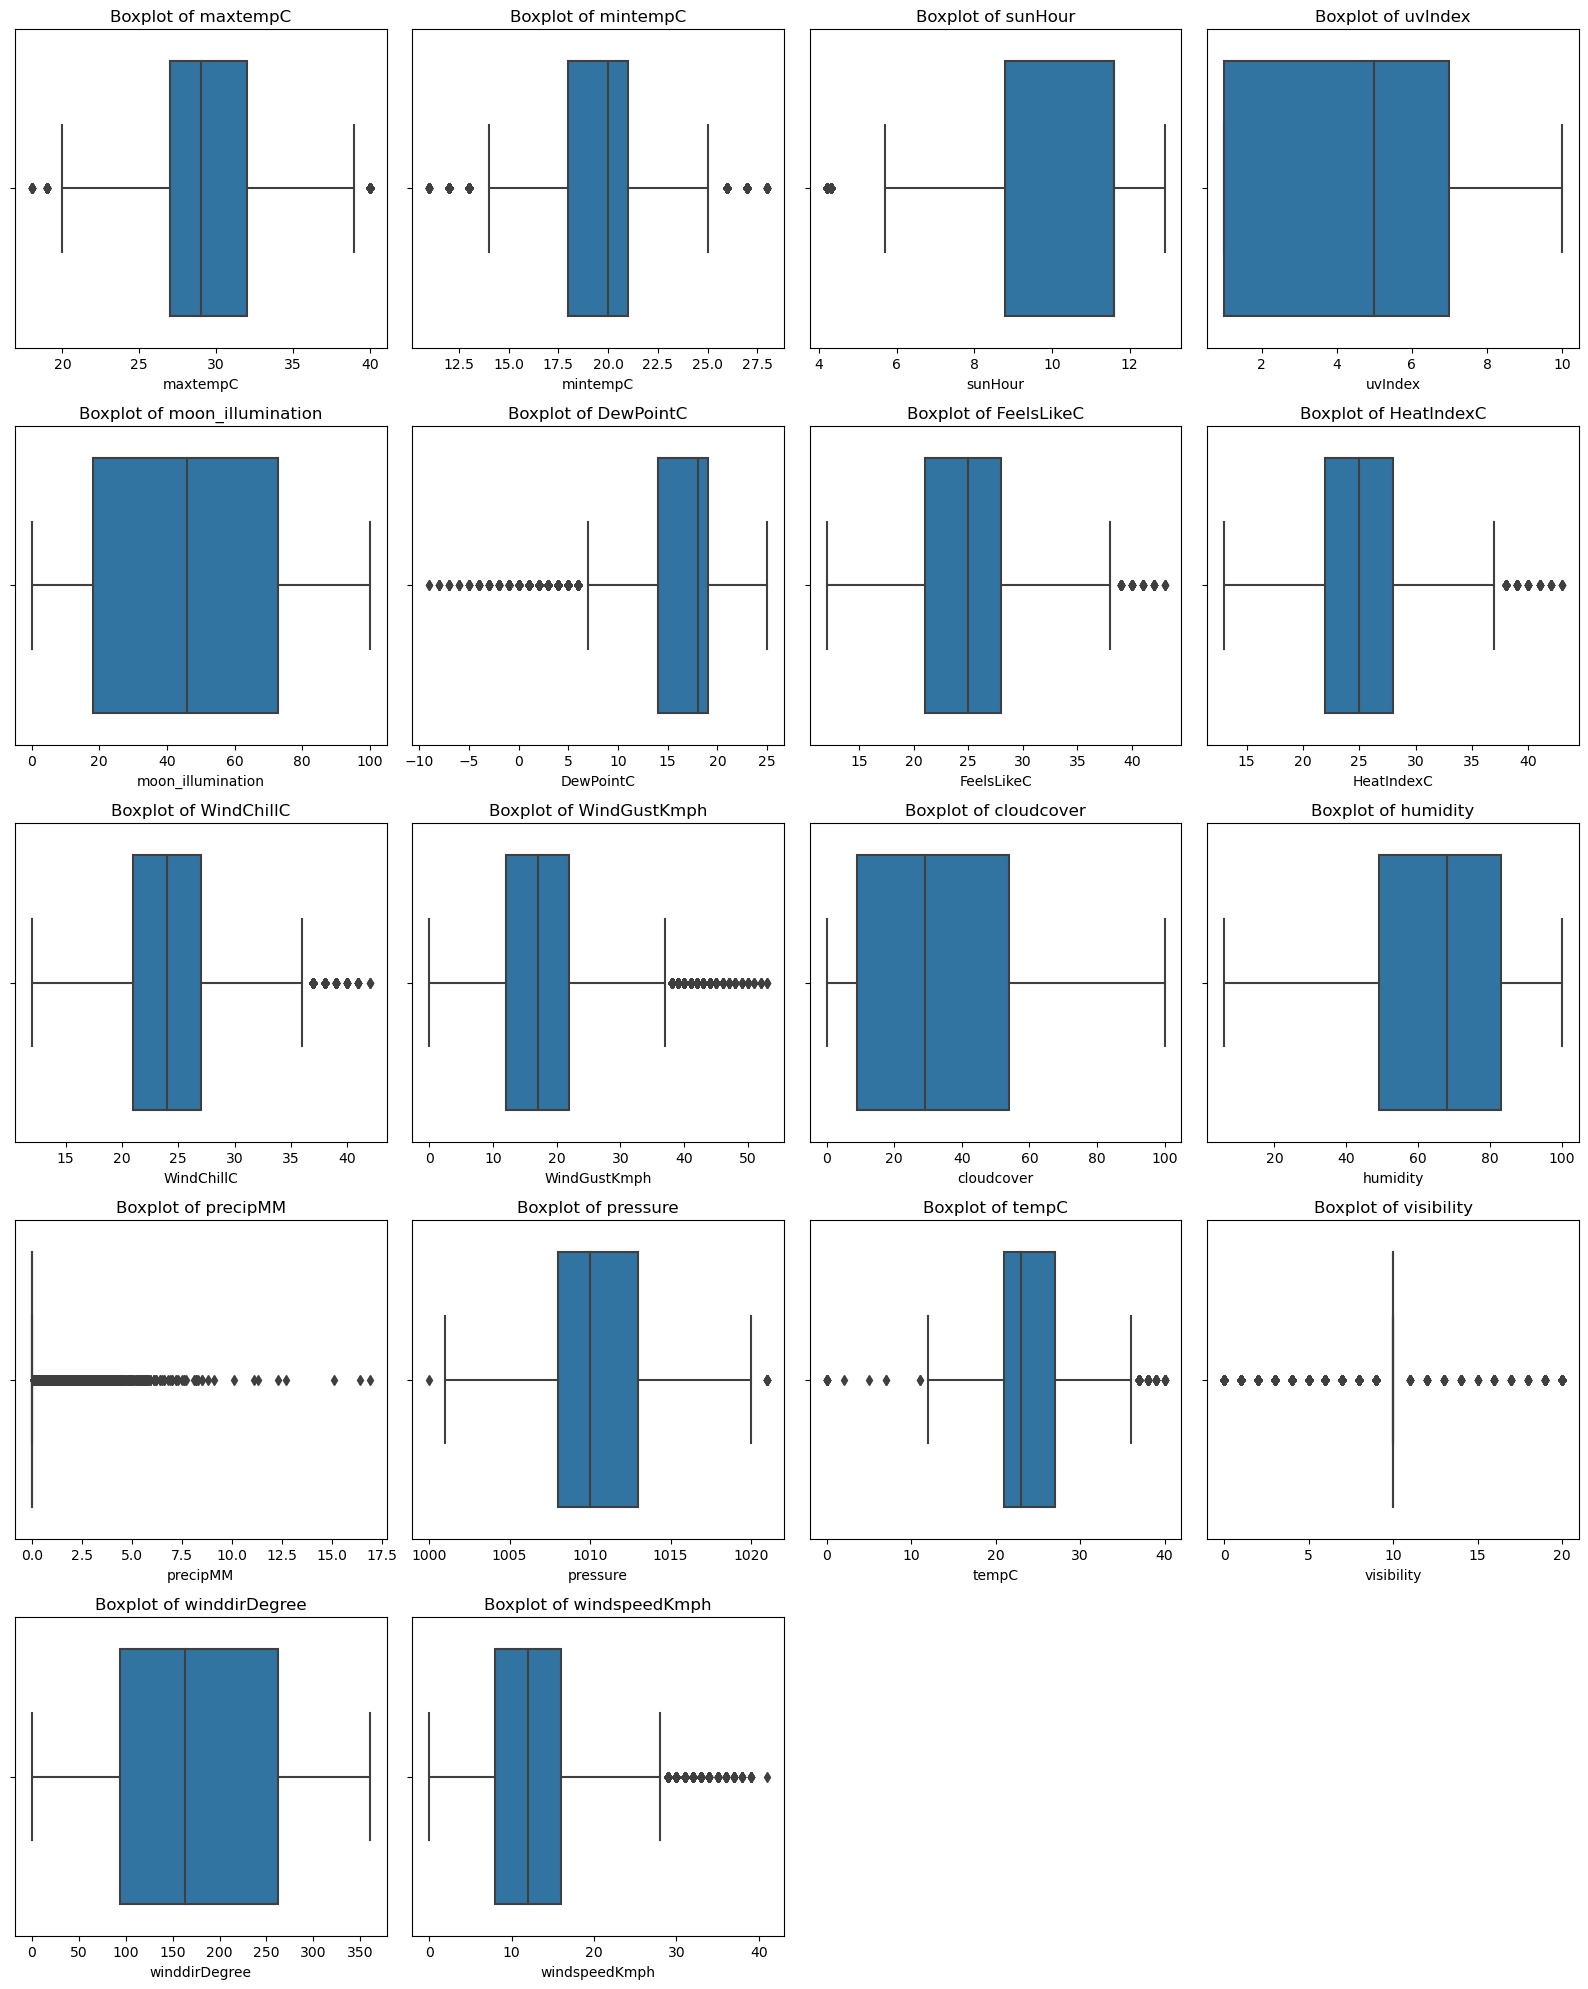

In [6]:
numeric_columns = df_bengaluru.select_dtypes(include=[np.number]).columns

cols_per_row = 4

n_rows = (len(numeric_columns) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 4, n_rows * 4))  

for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, cols_per_row, i + 1)
    sb.boxplot(x=df_bengaluru[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

## Defining IQR function for removing outliers


In [7]:
def removeOutliers(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  iqr = q3-q1
  lbound = q1-(1.5*iqr)
  ubound = q3+(1.5*iqr)
  filtered_df = df[(df >= lbound) & (df <= ubound)]

  return filtered_df

In [8]:
for i in range(len(dataframes)):
  df_temp = removeOutliers(dataframes[i][dataframes[i].columns[1:]])
  df_temp = df_temp.fillna(df_temp.mean())
  dataframes[i] = pd.concat([dataframes[i], df_temp], axis=1, join='inner', keys=['date_time'])
  dataframes[i].columns = dataframes[i].columns.droplevel(0)
  dataframes[i]

In [9]:
count=0
for df in dataframes:
  print("\n"+dataframe_names[count]+"\n")
  print(df.isnull().sum())
  count+=1


bengaluru

date_time            0
maxtempC             0
mintempC             0
sunHour              0
uvIndex              0
moon_illumination    0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64


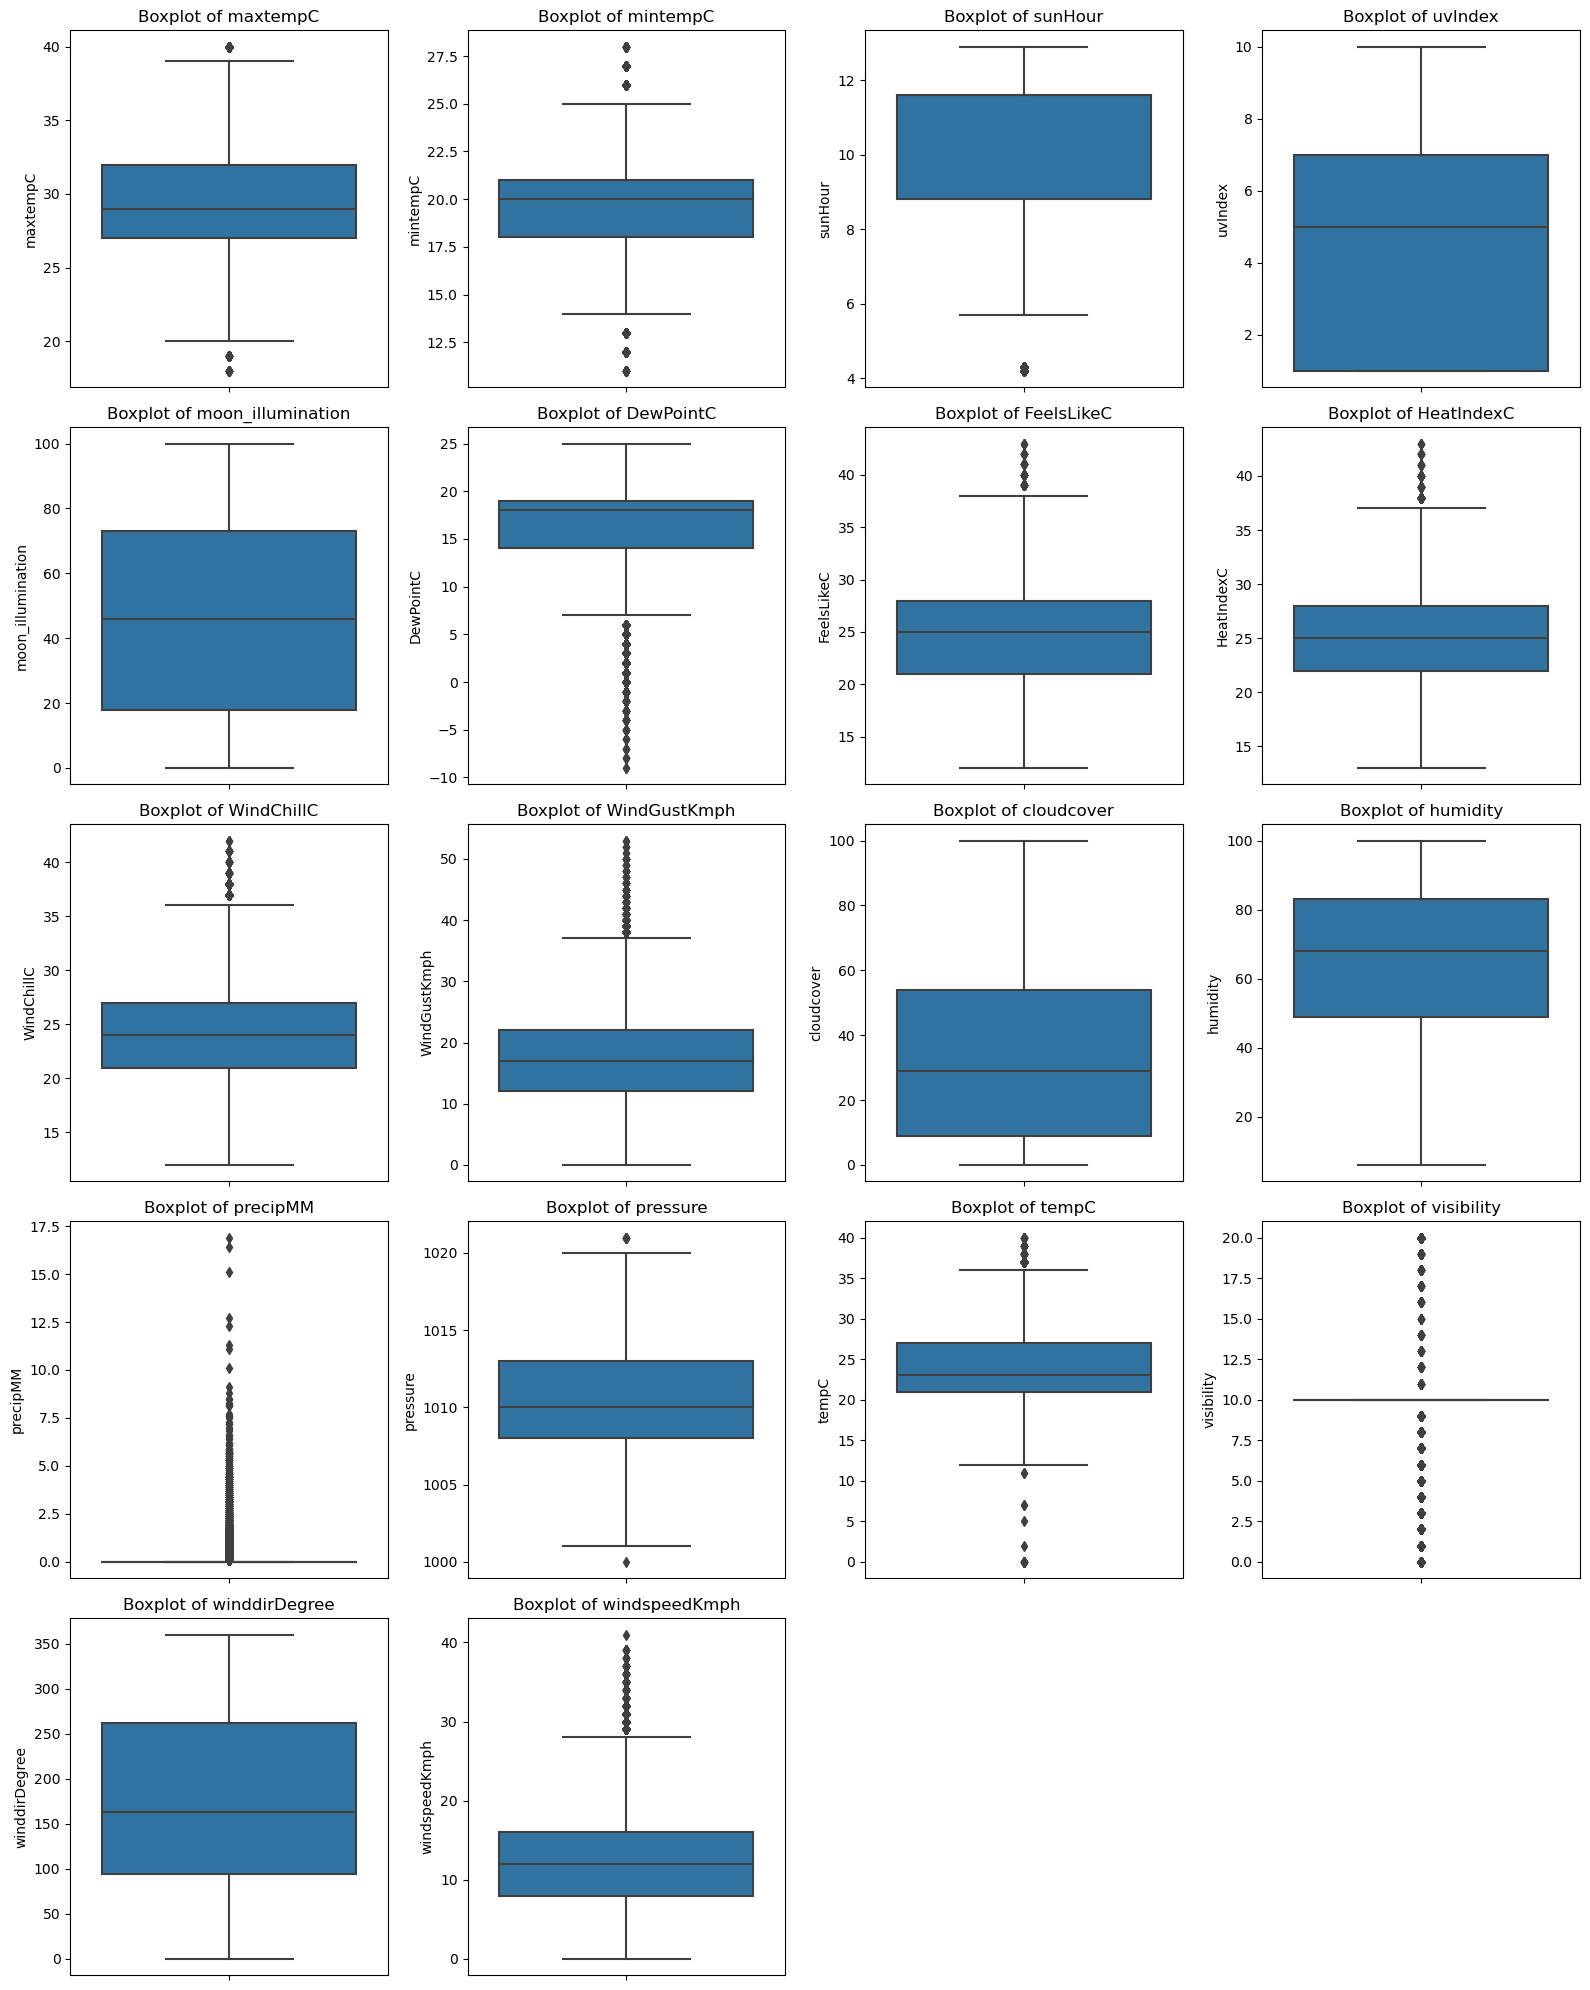

In [10]:
non_datetime_numeric_columns = (
    df_bengaluru.select_dtypes(exclude=["datetime64"])
    .select_dtypes(include=["number"])
    .columns
)

cols_per_row = 4

n_rows = (len(non_datetime_numeric_columns) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(
    nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 4, n_rows * 4)
)
axes = axes.flatten() 

for i, column in enumerate(non_datetime_numeric_columns):
    ax = axes[i]
    sb.boxplot(data=df_bengaluru, y=column, ax=ax)
    ax.set_title(f"Boxplot of {column}")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

# Time series cleaning
---



In [11]:
for df in dataframes:
  df['date_time'] = pd.to_datetime(df['date_time'])
df

,date_time,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,11.6,1,31,16,18,18,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,11.6,1,31,16,17,17,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,11.6,1,31,15,16,16,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,11.6,1,31,15,15,15,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,11.6,1,31,15,18,18,18,5,1,88,0.0,1015,14,5,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,26,18,8.7,1,37,18,25,25,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,8.7,1,37,18,22,24,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,8.7,1,37,18,21,23,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,8.7,1,37,18,20,22,20,24,69,88,0.4,1016,20,10,106,16


# Exploratory data analysis

## Univariate analysis

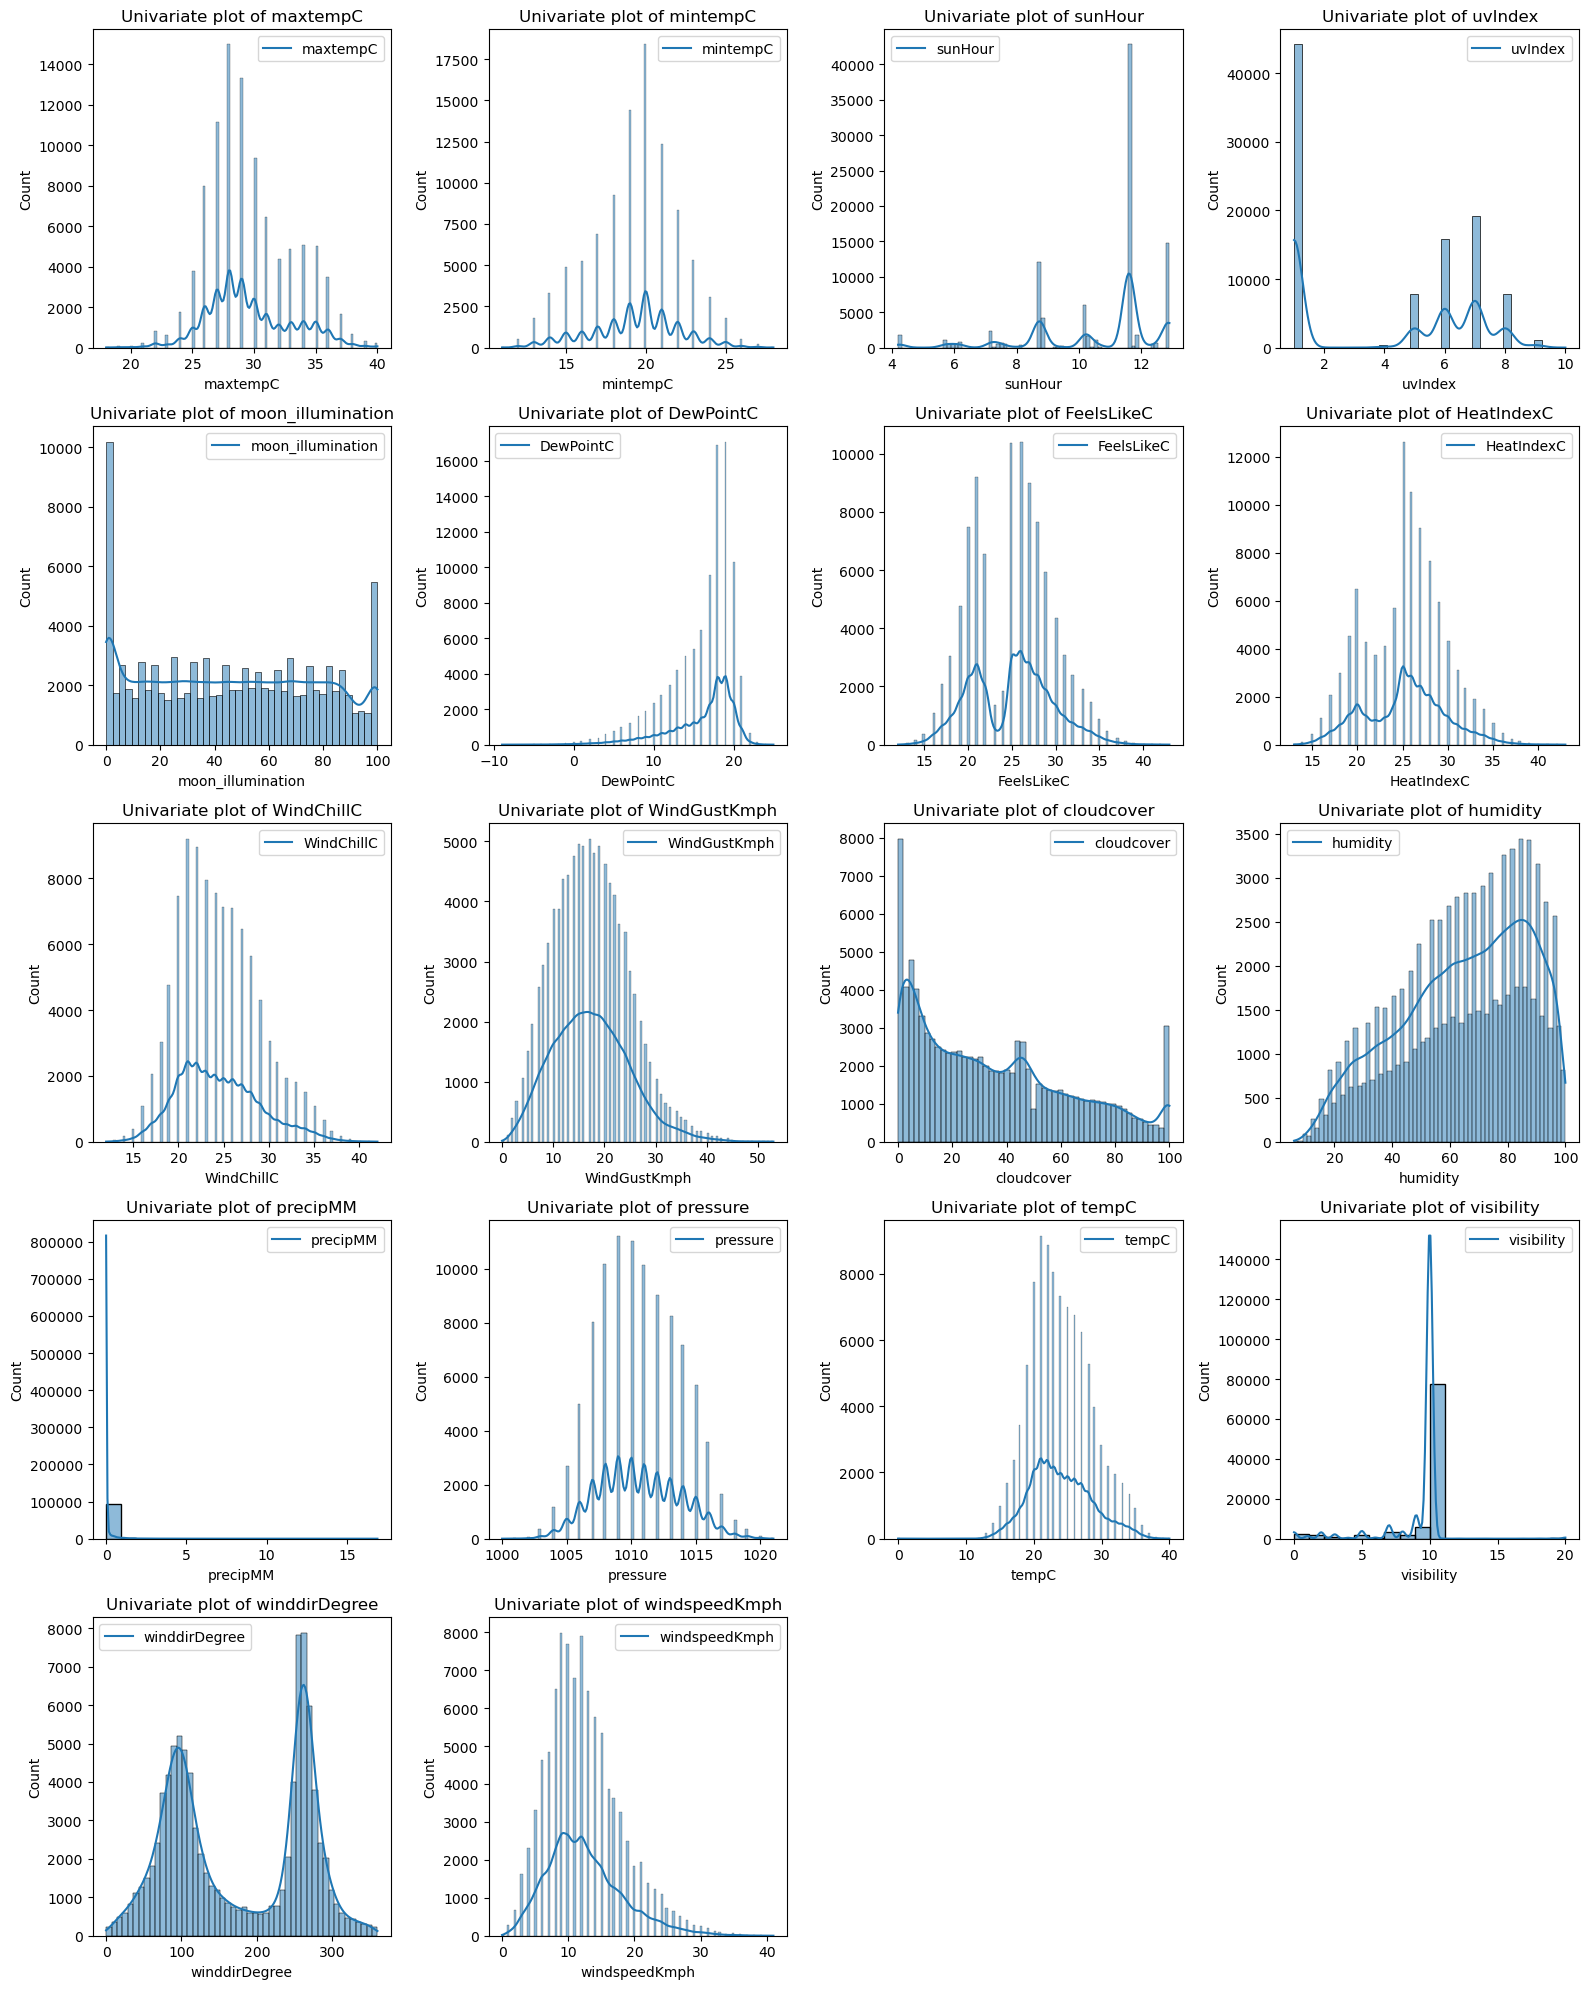

In [12]:
numeric_columns = df_bengaluru.select_dtypes(include=[np.number]).columns

cols_per_row = 4

n_rows = (len(numeric_columns) + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 4, n_rows * 4))  

for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, cols_per_row, i + 1)
    for df in dataframes:
        sb.histplot(df[column], kde=True)
    plt.title(f"Univariate plot of {column}")
    plt.legend({column})

plt.tight_layout()
plt.show()

## Bivariate Analysis


bengaluru



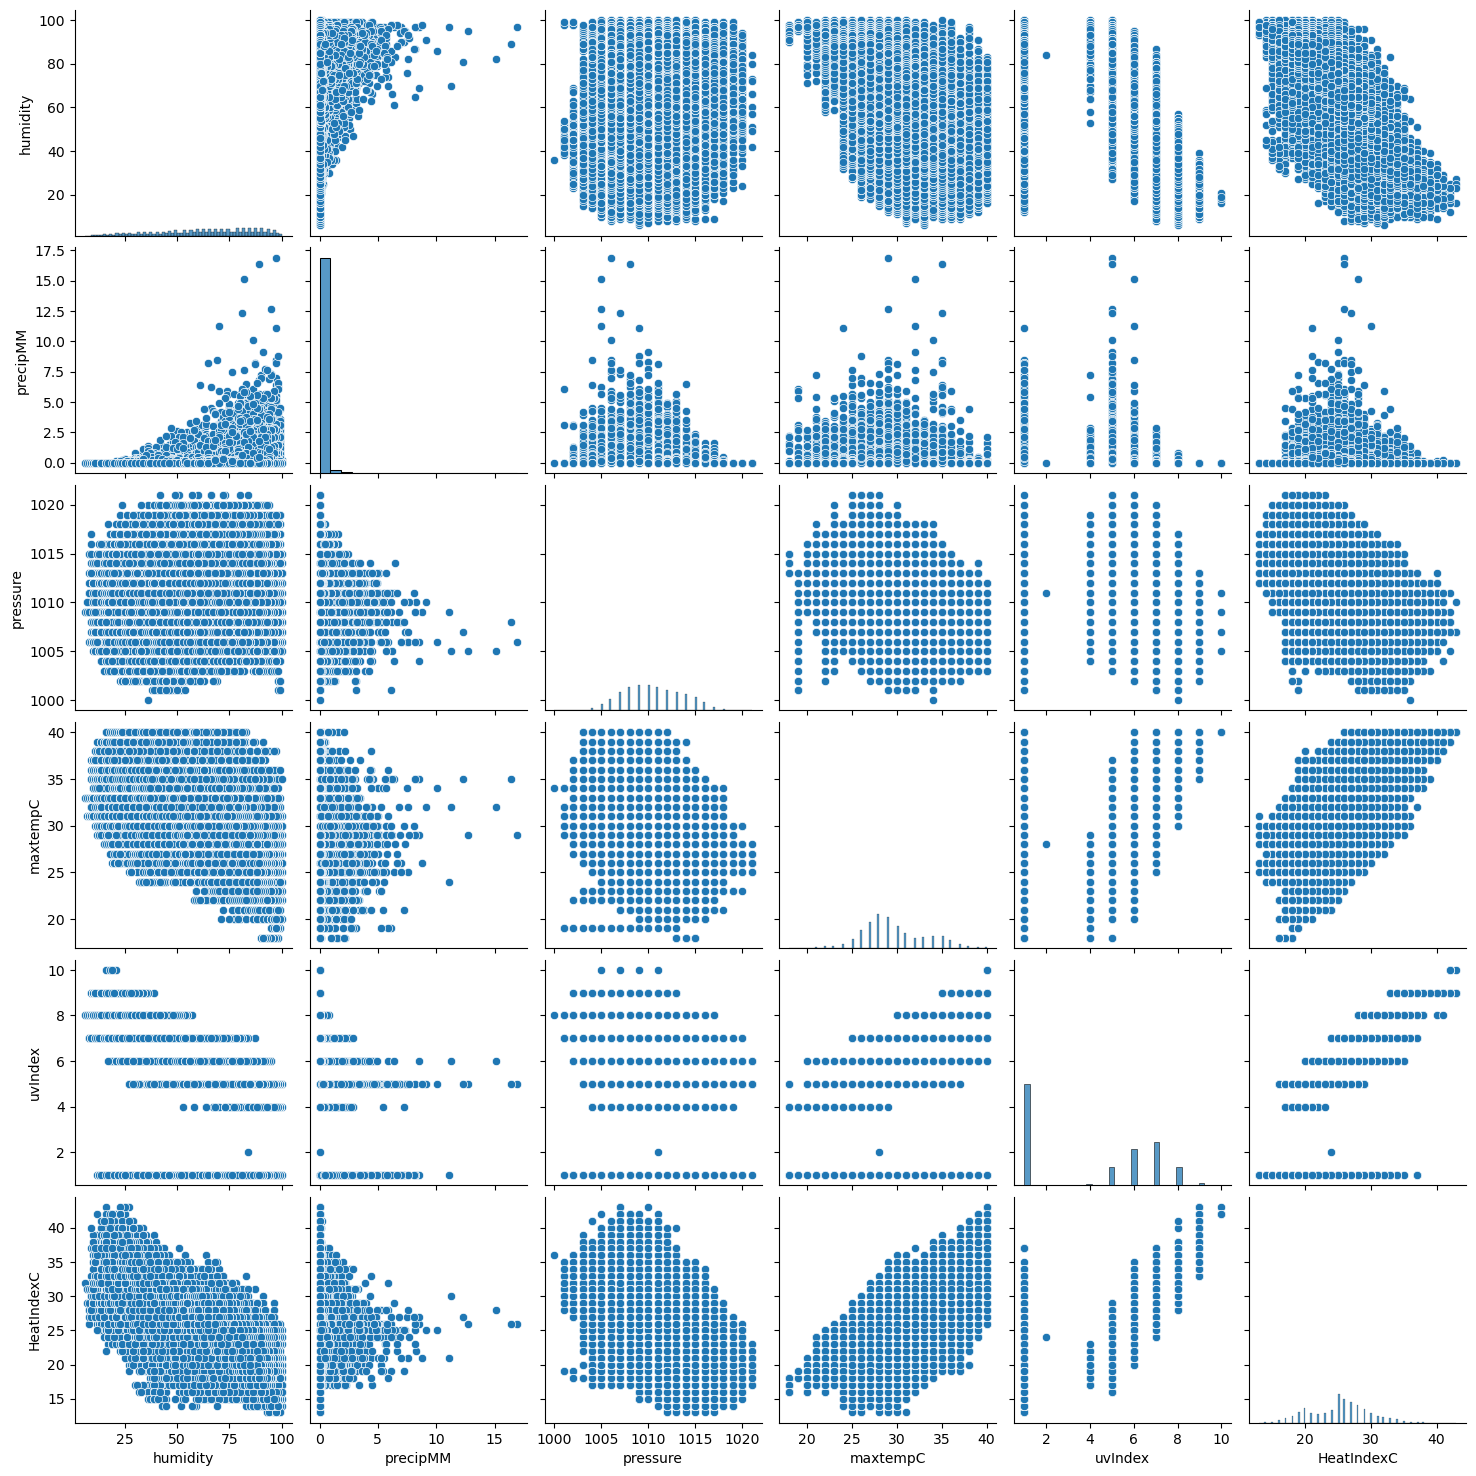

In [13]:
count=0
for df in dataframes:
  print("\n"+dataframe_names[count]+"\n")
  count+=1
  sb.pairplot(df[['humidity','precipMM','pressure','maxtempC','uvIndex','HeatIndexC']])
  plt.show()

## Heat Map

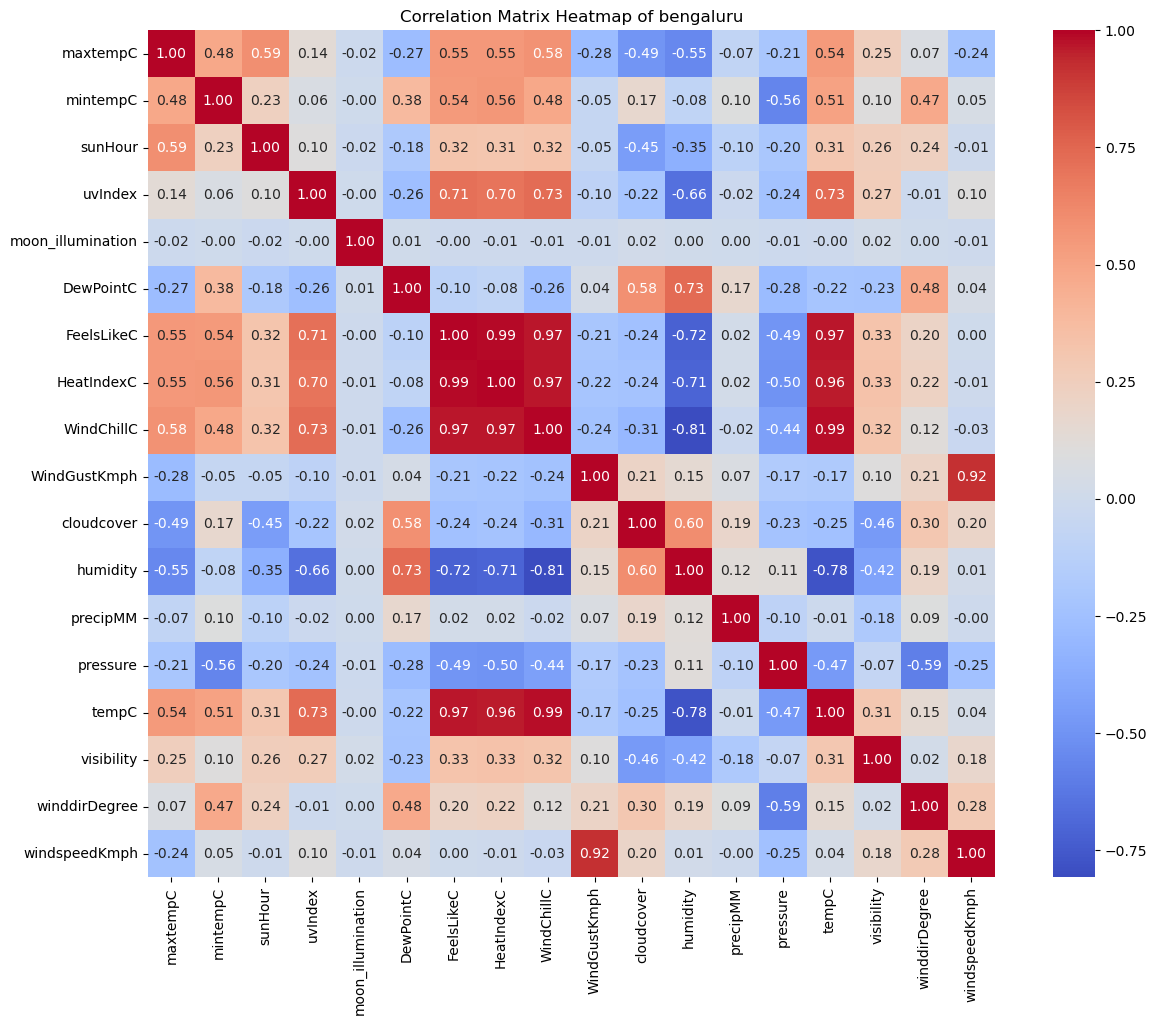

In [14]:
count=0
for df in dataframes:
  corrdf = df.drop(['date_time'], axis=1)
  correlation_matrix = corrdf.corr()
  # Creating a heatmap of the correlation matrix
  plt.figure(figsize=(15, 11))
  sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
  plt.title("Correlation Matrix Heatmap of "+ dataframe_names[count])
  count+=1
  plt.show()

In [15]:
count = 0
for df in dataframes:
  print("\n"+dataframe_names[count]+"\n")
  print(df.describe())
  count+=1


bengaluru

           maxtempC      mintempC       sunHour       uvIndex  \
count  96432.000000  96432.000000  96432.000000  96432.000000   
mean      29.646093     19.336735     10.653484      4.013751   
std        3.446427      2.773771      1.986738      2.869923   
min       18.000000     11.000000      4.200000      1.000000   
25%       27.000000     18.000000      8.800000      1.000000   
50%       29.000000     20.000000     11.600000      5.000000   
75%       32.000000     21.000000     11.600000      7.000000   
max       40.000000     28.000000     12.900000     10.000000   

       moon_illumination     DewPointC    FeelsLikeC    HeatIndexC  \
count       96432.000000  96432.000000  96432.000000  96432.000000   
mean           46.094077     16.085418     25.002261     25.269662   
std            31.249725      4.161604      4.586926      4.430811   
min             0.000000     -9.000000     12.000000     13.000000   
25%            18.000000     14.000000     21.000000

# Forecasting using Auto Regressive Integrated Moving Average(ARIMA)

In [16]:
!pip install statsmodels
!pip install scikit-learn


In [12]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

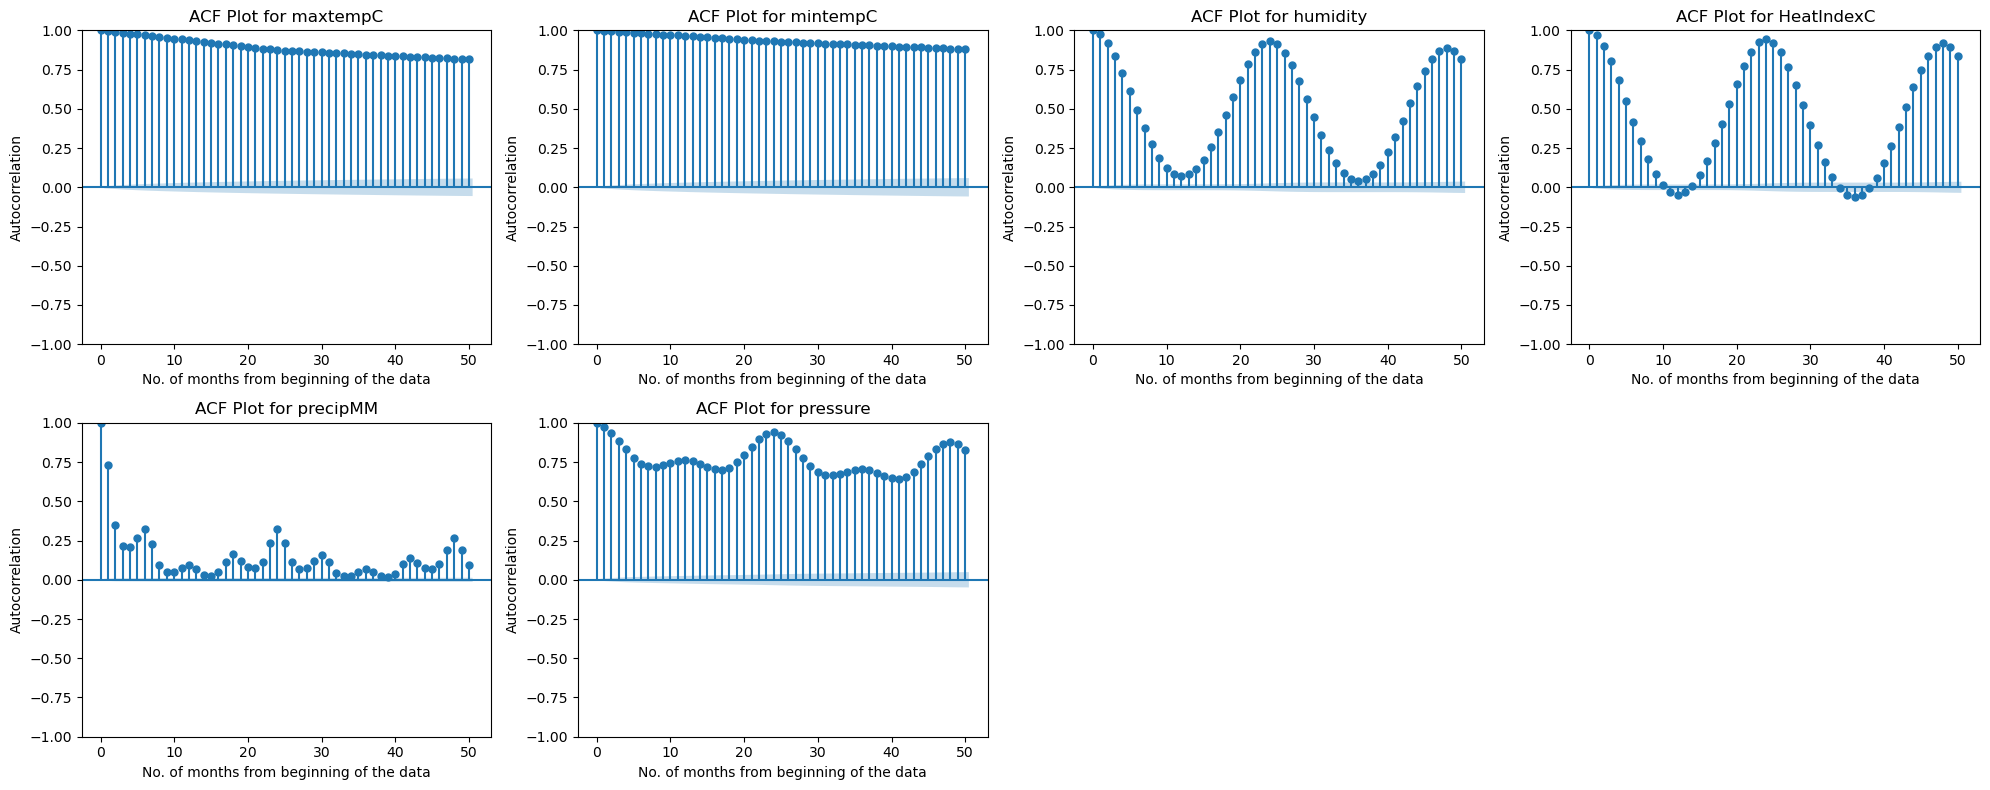

In [31]:
columns_to_plot = [
    "maxtempC",
    "mintempC",
    "humidity",
    "HeatIndexC",
    "precipMM",
    "pressure",
]

cols_per_row = 4

n_rows = (len(columns_to_plot) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(
    nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 5, n_rows * 4)
)
axes = axes.flatten()  

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    plot_acf(df_bengaluru[column], ax=ax)
    ax.set_xlabel("No. of months from beginning of the data")
    ax.set_ylabel("Autocorrelation")
    ax.set_title(f"ACF Plot for {column}")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


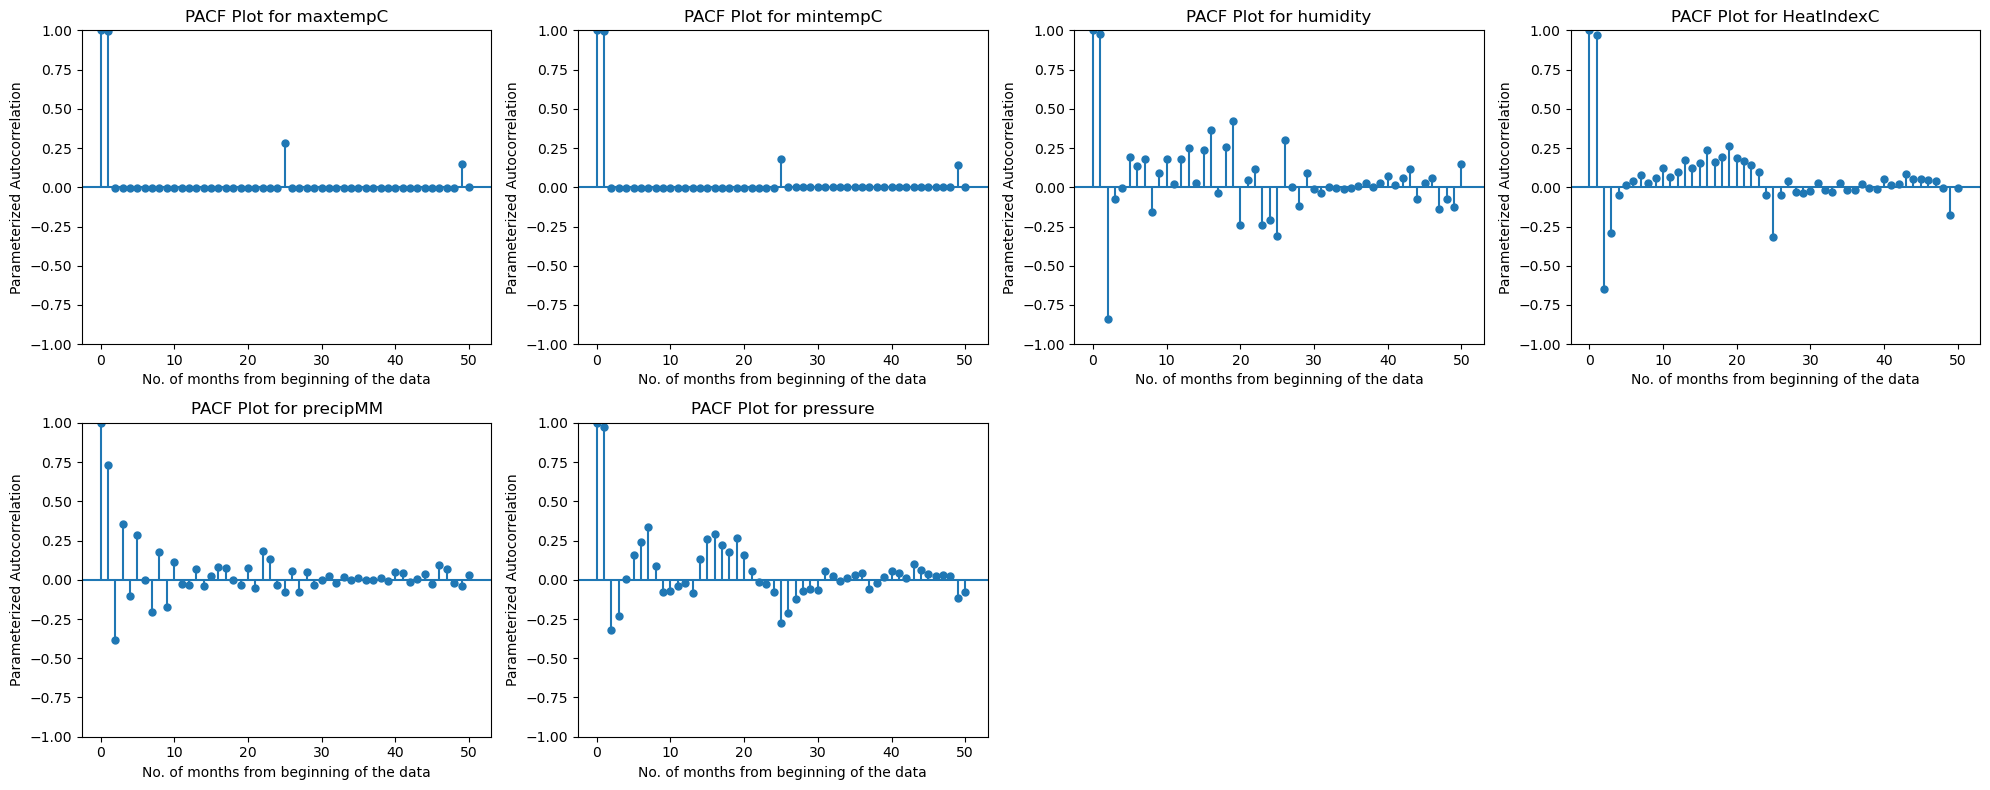

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf

columns_to_plot = [
    "maxtempC",
    "mintempC",
    "humidity",
    "HeatIndexC",
    "precipMM",
    "pressure",
]

cols_per_row = 4

n_rows = (len(columns_to_plot) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(
    nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 5, n_rows * 4)
)
axes = axes.flatten()  

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    plot_pacf(df_bengaluru[column], ax=ax)
    ax.set_xlabel("No. of months from beginning of the data")
    ax.set_ylabel("Parameterized Autocorrelation")
    ax.set_title(f"PACF Plot for {column}")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller
def checkStationarity(df):
  ans = adfuller(df, autolag='AIC')
  print('p = ',ans[1])

In [34]:
for column in columns_to_plot:
  print("\n"+column)
  count=0
  for df in dataframes:
    print("\n"+dataframe_names[count]+"\n")
    checkStationarity(df[column])
    count+=1


maxtempC

bengaluru

p =  2.364601669497695e-19

mintempC

bengaluru

p =  9.03363541800585e-15

humidity

bengaluru

p =  1.25882033137862e-17

HeatIndexC

bengaluru

p =  1.1319615001525936e-13

precipMM

bengaluru

p =  0.0

pressure

bengaluru

p =  6.133746398364959e-14


## Data For Training and Testing SARIMA Model 

In [17]:
# For 'maxtempC'
ytrain_maxTempC=df['maxtempC'][:-8640]
ytest_maxTempC=df['maxtempC'][-8640:]

# For 'mintempC'
ytrain_minTempC = df['mintempC'][:-8640]
ytest_minTempC = df['mintempC'][-8640:]

# For 'humidity'
ytrain_humidity = df['humidity'][:-8640]
ytest_humidity = df['humidity'][-8640:]

# For 'HeatIndexC'
ytrain_HeatIndexC = df['HeatIndexC'][:-8640]
ytest_HeatIndexC = df['HeatIndexC'][-8640:]

# For 'precipMM'
ytrain_precipMM = df['precipMM'][:-8640]
ytest_precipMM = df['precipMM'][-8640:]

# For 'pressure'
ytrain_pressure = df['pressure'][:-8640]
ytest_pressure = df['pressure'][-8640:]

## SARIMA for maxTempC

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.62105D+00    |proj g|=  3.39945D-01


 This problem is unconstrained.



At iterate    5    f= -2.73379D+00    |proj g|=  2.15208D+00

At iterate   10    f= -2.86812D+00    |proj g|=  7.45033D+00

At iterate   15    f= -2.88303D+00    |proj g|=  1.21975D+00

At iterate   20    f= -2.91170D+00    |proj g|=  1.89741D+00

At iterate   25    f= -2.91330D+00    |proj g|=  1.23895D-01

At iterate   30    f= -2.91368D+00    |proj g|=  1.83811D-01

At iterate   35    f= -2.92292D+00    |proj g|=  3.55557D+00

At iterate   40    f= -2.94405D+00    |proj g|=  7.15983D-01

At iterate   45    f= -2.94541D+00    |proj g|=  2.65284D-02

At iterate   50    f= -2.94582D+00    |proj g|=  2.68946D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     22      1     0     0   4.629D-03  -2.948D+00
  F =  -2.9484548383684839     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94840D+00    |proj g|=  1.51374D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   1.514D-02  -2.948D+00
  F =  -2.9483977306596074     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.95132D+00    |proj g|=  4.45136D-01

At iterate    5    f= -2.95133D+00    |proj g|=  7.78232D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     25      1     0     0   7.772D-02  -2.951D+00
  F =  -2.9513297468469339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.95391D+00    |proj g|=  4.84276D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     12      1     0     0   3.597D-02  -2.954D+00
  F =  -2.9539132709201334     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.95581D+00    |proj g|=  3.36038D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     19      1     0     0   5.249D-02  -2.956D+00
  F =  -2.9558135962870913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.95805D+00    |proj g|=  4.06094D-01

At iterate    5    f= -2.95805D+00    |proj g|=  2.82859D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      9      1     0     0   2.829D-03  -2.958D+00
  F =  -2.9580497486329818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.95613D+00    |proj g|=  3.03225D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     19      1     0     0   3.811D-02  -2.956D+00
  F =  -2.9561356269295835     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.95780D+00    |proj g|=  3.01615D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     15      1     0     0   5.832D-02  -2.958D+00
  F =  -2.9578014942910413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.9

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     15      1     0     0   6.041D-02  -2.959D+00
  F =  -2.9594425528609536     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96030D+00    |proj g|=  1.96272D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     32      1     0     0   1.628D-01  -2.960D+00
  F =  -2.9603002598829415     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.96174D+00    |proj g|=  3.91895D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      7      1     0     0   1.875D-03  -2.962D+00
  F =  -2.9617445188621678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
[28.00455777 28.00455777 28.00455777 ... 22.04346453 22.04346453
 22.04346453]
RMSE: 2.3449923423140917
MAE: 1.8156403356884585


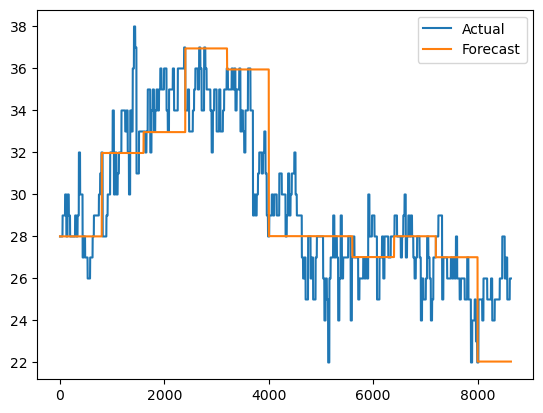

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys, os

warnings.filterwarnings("ignore")

class NullWriter(object):
    def write(self, arg):
        pass


nullwrite = NullWriter()
oldstdout = sys.stdout
sys.stdout = nullwrite

try:
    model_bengaluru_maxTempC = SARIMAX(
        np.log(ytrain_maxTempC), order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)
    )
    model_bengaluru_fit_maxTempC = model_bengaluru_maxTempC.fit()

    forecasts = []
    newObs = []

    for i in range(8640):
        yforecast_transformed = model_bengaluru_fit_maxTempC.get_forecast(steps=1)
        yforecast = np.exp(yforecast_transformed.predicted_mean)
        forecasts.append(yforecast.item())

        if i < len(ytest_maxTempC):
            testObs = ytest_maxTempC.iloc[i]
            newObs.append(np.log(testObs))

        if (i + 1) % 800 == 0 and newObs:
            model_bengaluru_fit_maxTempC = model_bengaluru_fit_maxTempC.append(
                newObs, refit=True
            )
            newObs = []

    if newObs:
        model_bengaluru_fit_maxTempC = model_bengaluru_fit_maxTempC.append(
            newObs, refit=True
        )

    forecasts = np.array(forecasts)

finally:
    sys.stdout = oldstdout

print(forecasts)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(ytest_maxTempC, forecasts))
mae = mean_absolute_error(ytest_maxTempC, forecasts)

print("RMSE:", rmse)
print("MAE:", mae)

x = np.arange(1, 8641)
plt.plot(x, ytest_maxTempC, label="Actual")
plt.plot(x, forecasts, label="Forecast")
plt.legend()
plt.show()

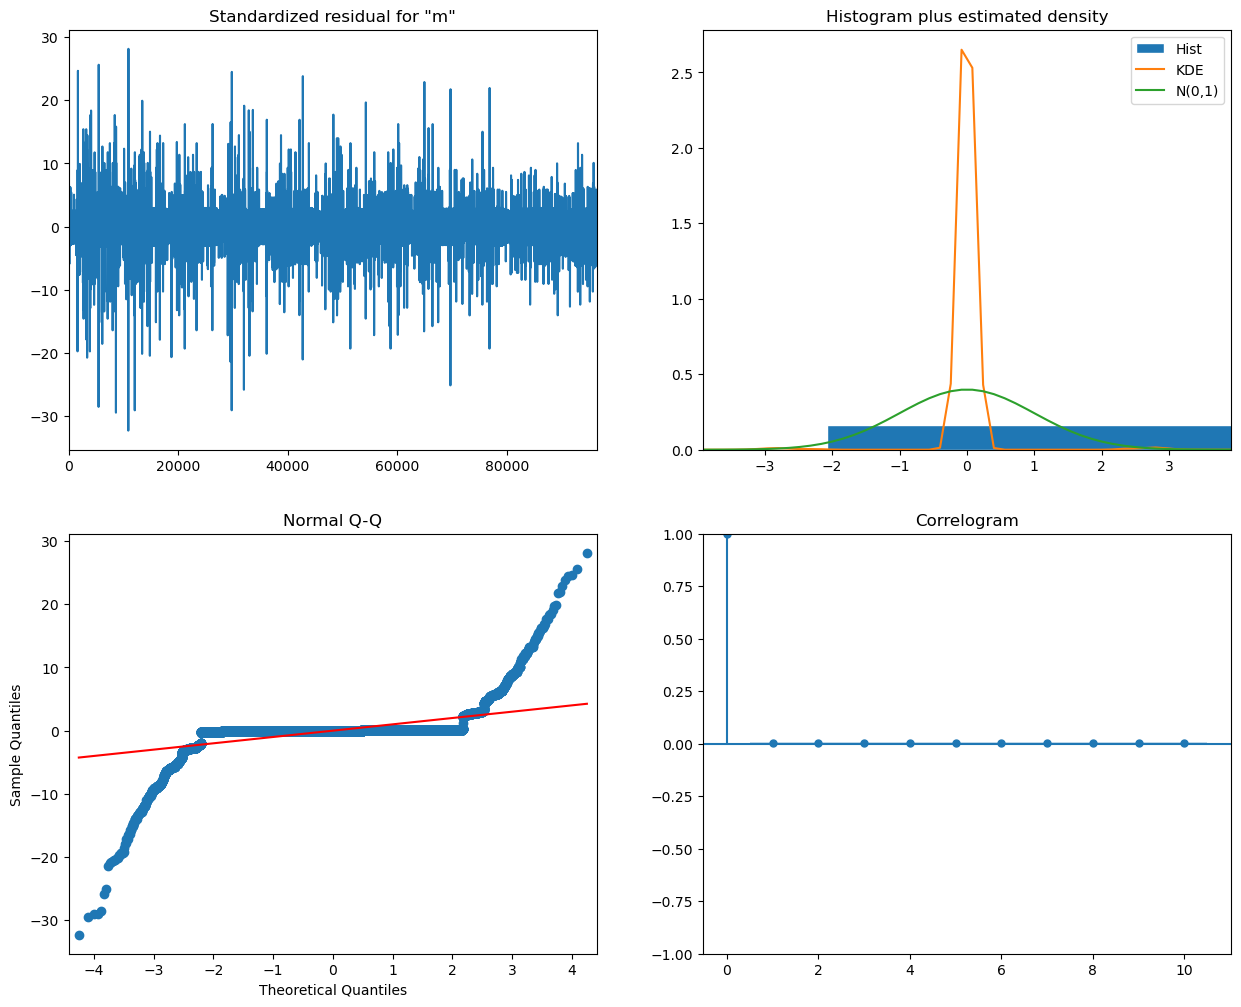

In [37]:
model_bengaluru_fit_maxTempC.plot_diagnostics(figsize=(15, 12))
plt.show()

## SARIMA for minTempC

RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.70209D+00    |proj g|=  4.07371D-01

At iterate    5    f= -2.84152D+00    |proj g|=  2.53065D+00

At iterate   10    f= -2.84211D+00    |proj g|=  1.22027D+00

At iterate   15    f= -2.86236D+00    |proj g|=  8.79904D+00

At iterate   20    f= -2.91361D+00    |proj g|=  5.01478D-01

At iterate   25    f= -2.98472D+00    |proj g|=  2.08298D+00

At iterate   30    f= -2.98576D+00    |proj g|=  2.68276D-01

At iterate   35    f= -3.00793D+00    |proj g|=  1.53748D+00

At iterate   40    f= -3.02603D+00    |proj g|=  1.74416D-01

At iterate   45    f= -3.02616D+00    |proj g|=  5.98642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Ca

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02658D+00    |proj g|=  7.58481D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     22      1     0     0   6.390D-02  -3.027D+00
  F =  -3.0265833295021909     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02524D+00    |proj g|=  1.65648D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     19      1     0     0   6.792D-02  -3.025D+00
  F =  -3.0252464324426867     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02764D+00    |proj g|=  4.74352D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     32      1     0     0   1.766D-01  -3.028D+00
  F =  -3.0276437787617287     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02895D+00    |proj g|=  3.97982D-01


 This problem is unconstrained.



At iterate    5    f= -3.02895D+00    |proj g|=  1.36746D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     31      1     0     0   1.368D-01  -3.029D+00
  F =  -3.0289506373363282     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02295D+00    |proj g|=  8.89412D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     46      2     0     0   3.103D-03  -3.023D+00
  F =  -3.0229852045754821     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02566D+00    |proj g|=  4.50011D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -3.02567D+00    |proj g|=  9.84654D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5     28      1     0     0   9.847D-02  -3.026D+00
  F =  -3.0256657881701243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.02850D+00    |proj g|=  5.80209D-01


 This problem is unconstrained.



At iterate    5    f= -3.02851D+00    |proj g|=  7.07477D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6     26      1     0     0   7.075D-02  -3.029D+00
  F =  -3.0285075310620306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03124D+00    |proj g|=  5.35725D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     16      1     0     0   4.743D-02  -3.031D+00
  F =  -3.0312410492102786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03398D+00    |proj g|=  5.15979D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     12      1     0     0   3.907D-03  -3.034D+00
  F =  -3.0339870327904865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03227D+00    |proj g|=  2.99558D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      6      1     0     0   2.186D-05  -3.032D+00
  F =  -3.0322755211912131     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     53      2     0     0   7.102D-02  -3.032D+00
  F =  -3.0316388963409939     

ABNORMAL_TERMINATION_IN_LNSRCH                              
[16.00535548 16.00535548 16.00535548 ... 17.01050635 17.01050635
 17.01050635]
RMSE: 1.8111994020208784
MAE: 1.2911466230378181


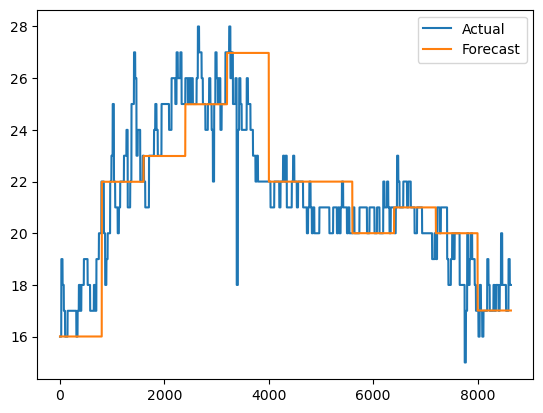

In [38]:
warnings.filterwarnings("ignore")

class NullWriter(object):
    def write(self, arg):
        pass

nullwrite = NullWriter()
oldstdout = sys.stdout
sys.stdout = nullwrite

try:
    model_bengaluru_minTempC = SARIMAX(
        np.log(ytrain_minTempC), order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)
    )
    model_bengaluru_fit_minTempC = model_bengaluru_minTempC.fit()

    forecasts = []
    newObs = []

    for i in range(8640):
        yforecast_transformed = model_bengaluru_fit_minTempC.get_forecast(steps=1)
        yforecast = np.exp(yforecast_transformed.predicted_mean)
        forecasts.append(yforecast.item())

        if i < len(ytest_minTempC):
            testObs = ytest_minTempC.iloc[i]
            newObs.append(np.log(testObs))

        if (i + 1) % 800 == 0 and newObs:
            model_bengaluru_fit_minTempC = model_bengaluru_fit_minTempC.append(
                newObs, refit=True
            )
            newObs = []

    if newObs:
        model_bengaluru_fit_minTempC = model_bengaluru_fit_minTempC.append(
            newObs, refit=True
        )

    forecasts = np.array(forecasts)

finally:
    sys.stdout = oldstdout

print(forecasts)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(ytest_minTempC, forecasts))
mae = mean_absolute_error(ytest_minTempC, forecasts)

print("RMSE:", rmse)
print("MAE:", mae)

x = np.arange(1, 8641)
plt.plot(x, ytest_minTempC, label="Actual")
plt.plot(x, forecasts, label="Forecast")
plt.legend()
plt.show()

## SARIMA for Humidity

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.20674D-01    |proj g|=  6.08616D+00

At iterate    5    f= -1.83325D+00    |proj g|=  3.03668D-01

At iterate   10    f= -1.85494D+00    |proj g|=  7.04980D+00

At iterate   15    f= -1.88609D+00    |proj g|=  5.65484D-01

At iterate   20    f= -1.90321D+00    |proj g|=  4.41888D+00

At iterate   25    f= -1.91950D+00    |proj g|=  3.03867D-02

At iterate   30    f= -1.91951D+00    |proj g|=  1.30844D-01

At iterate   35    f= -1.92080D+00    |proj g|=  1.77268D+00

At iterate   40    f= -1.92478D+00    |proj g|=  1.34494D-02

At iterate   45    f= -1.92483D+00    |proj g|=  5.00851D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92503D+00    |proj g|=  1.12252D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1      5      1     0     0   8.688D-03  -1.925D+00
  F =  -1.9250287235529180     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92482D+00    |proj g|=  3.33569D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     18      1     0     0   3.960D-04  -1.925D+00
  F =  -1.9248175774114422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92532D+00    |proj g|=  2.88428D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     19      1     0     0   1.492D-03  -1.925D+00
  F =  -1.9253207807777015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92591D+00    |proj g|=  3.48700D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     11      1     0     0   1.998D-03  -1.926D+00
  F =  -1.9259108126224611     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.9

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     12      1     0     0   1.289D-03  -1.926D+00
  F =  -1.9263371053839498     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92556D+00    |proj g|=  4.28645D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     17      1     0     0   8.868D-04  -1.926D+00
  F =  -1.9255607892099833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92470D+00    |proj g|=  4.82253D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     33      2     0     0   1.068D-03  -1.925D+00
  F =  -1.9246965984015683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92323D+00    |proj g|=  8.22372D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     35      2     0     0   3.322D-03  -1.923D+00
  F =  -1.9232296405815632     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92304D+00    |proj g|=  7.64338D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     12      1     0     0   1.167D-03  -1.923D+00
  F =  -1.9230368375267957     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92257D+00    |proj g|=  2.55992D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     14      1     0     0   7.176D-04  -1.923D+00
  F =  -1.9225738190424129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92206D+00    |proj g|=  2.86791D-02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     16      1     0     0   7.099D-04  -1.922D+00
  F =  -1.9220578291001844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92137D+00    |proj g|=  3.85142D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     10      1     0     0   9.097D-04  -1.921D+00
  F =  -1.9213671007067608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92076D+00    |proj g|=  3.33741D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     14      1     0     0   1.276D-03  -1.921D+00
  F =  -1.9207636198606850     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92059D+00    |proj g|=  9.28579D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     17      1     0     0   1.363D-03  -1.921D+00
  F =  -1.9205876323381106     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92046D+00    |proj g|=  6.72781D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2      6      1     0     0   1.708D-03  -1.920D+00
  F =  -1.9204571574358200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92074D+00    |proj g|=  1.48663D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2      7      1     0     0   7.887D-03  -1.921D+00
  F =  -1.9207419499195637     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92108D+00    |proj g|=  2.70012D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     12      1     0     0   1.750D-03  -1.921D+00
  F =  -1.9210817867793200     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92118D+00    |proj g|=  6.59408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     13      1     0     0   6.593D-03  -1.921D+00
  F =  -1.9211777272472030     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92173D+00    |proj g|=  3.75103D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     44      2     0     0   2.162D-03  -1.922D+00
  F =  -1.9217266635435488     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92240D+00    |proj g|=  4.02496D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     12      1     0     0   2.426D-03  -1.922D+00
  F =  -1.9224022496634428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92326D+00    |proj g|=  5.09944D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     14      1     0     0   3.562D-03  -1.923D+00
  F =  -1.9232630763277974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92409D+00    |proj g|=  5.02932D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     11      1     0     0   3.490D-03  -1.924D+00
  F =  -1.9240906729674003     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.9

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     10      1     0     0   2.022D-03  -1.925D+00
  F =  -1.9246646183327918     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92548D+00    |proj g|=  4.78802D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     13      1     0     0   3.229D-03  -1.925D+00
  F =  -1.9254755626586124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92636D+00    |proj g|=  5.30363D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     19      1     0     0   3.800D-03  -1.926D+00
  F =  -1.9263556507414670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92722D+00    |proj g|=  5.27634D-02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     16      1     0     0   3.769D-03  -1.927D+00
  F =  -1.9272200911433679     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92810D+00    |proj g|=  5.39035D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     17      1     0     0   3.899D-03  -1.928D+00
  F =  -1.9281044339201105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92893D+00    |proj g|=  5.07589D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     17      1     0     0   3.551D-03  -1.929D+00
  F =  -1.9289302990094555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92982D+00    |proj g|=  5.40269D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     16      1     0     0   3.918D-03  -1.930D+00
  F =  -1.9298191286029514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93070D+00    |proj g|=  5.37642D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     11      1     0     0   3.892D-03  -1.931D+00
  F =  -1.9306961045041044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93162D+00    |proj g|=  5.62204D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     22      1     0     0   4.171D-03  -1.932D+00
  F =  -1.9316159374297102     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93254D+00    |proj g|=  5.68617D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     13      1     0     0   4.246D-03  -1.933D+00
  F =  -1.9325413058878915     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93340D+00    |proj g|=  5.31488D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     20      1     0     0   3.831D-03  -1.933D+00
  F =  -1.9333993613701643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93431D+00    |proj g|=  5.55680D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     15      1     0     0   4.104D-03  -1.934D+00
  F =  -1.9343063325576764     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93518D+00    |proj g|=  5.38994D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     23      1     0     0   3.919D-03  -1.935D+00
  F =  -1.9351784974929491     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93598D+00    |proj g|=  4.98745D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     11      1     0     0   3.474D-03  -1.936D+00
  F =  -1.9359827085066939     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93667D+00    |proj g|=  4.28062D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     20      1     0     0   2.723D-03  -1.937D+00
  F =  -1.9366704862701227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93743D+00    |proj g|=  4.64522D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     24      1     0     0   3.108D-03  -1.937D+00
  F =  -1.9374345515495905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93821D+00    |proj g|=  4.76251D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     15      1     0     0   3.237D-03  -1.938D+00
  F =  -1.9382117971967108     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93909D+00    |proj g|=  5.33923D-02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     20      1     0     0   3.874D-03  -1.939D+00
  F =  -1.9390867755523411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93988D+00    |proj g|=  4.92579D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     24      1     0     0   3.420D-03  -1.940D+00
  F =  -1.9398778731005666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.94068D+00    |proj g|=  4.93528D-02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     18      1     0     0   3.435D-03  -1.941D+00
  F =  -1.9406778799428179     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.94135D+00    |proj g|=  4.23066D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     18      1     0     0   2.693D-03  -1.941D+00
  F =  -1.9413543966835953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.94154D+00    |proj g|=  1.33165D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2      7      1     0     0   7.787D-03  -1.942D+00
  F =  -1.9415390055405568     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
[78.07357333 78.07357333 78.07357333 ... 77.87717143 77.87717143
 77.87717143]
RMSE: 18.61069300119987
MAE: 14.262124003120833


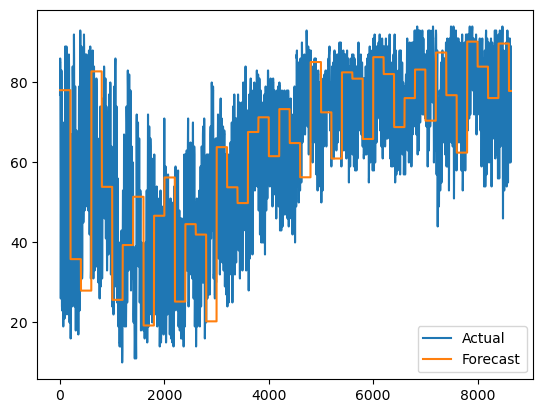

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys, os

warnings.filterwarnings("ignore")


class NullWriter(object):
    def write(self, arg):
        pass


nullwrite = NullWriter()
oldstdout = sys.stdout
sys.stdout = nullwrite

try:
    model_bengaluru_humidity = SARIMAX(
        np.log(ytrain_humidity), order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)
    )
    model_bengaluru_fit_humidity = model_bengaluru_humidity.fit()

    forecasts = []
    newObs = []

    for i in range(8640):
        yforecast_transformed = model_bengaluru_fit_humidity.get_forecast(steps=1)
        yforecast = np.exp(yforecast_transformed.predicted_mean)
        forecasts.append(yforecast.item())

        if i < len(ytest_humidity):
            testObs = ytest_humidity.iloc[i]
            newObs.append(np.log(testObs))

        if (i + 1) % 200 == 0 and newObs:
            model_bengaluru_fit_humidity = model_bengaluru_fit_humidity.append(
                newObs, refit=True
            )
            newObs = []

    if newObs:
        model_bengaluru_fit_humidity = model_bengaluru_fit_humidity.append(
            newObs, refit=True
        )

    forecasts = np.array(forecasts)

finally:
    sys.stdout = oldstdout

print(forecasts)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(ytest_humidity, forecasts))
mae = mean_absolute_error(ytest_humidity, forecasts)

print("RMSE:", rmse)
print("MAE:", mae)

x = np.arange(1, 8641)
plt.plot(x, ytest_humidity, label="Actual")
plt.plot(x, forecasts, label="Forecast")
plt.legend()
plt.show()

## SARIMA for HeatIndexC

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.54868D+00    |proj g|=  1.03314D+01


 This problem is unconstrained.



At iterate    5    f= -1.93517D+00    |proj g|=  1.75260D+00

At iterate   10    f= -2.06129D+00    |proj g|=  1.45982D-01

At iterate   15    f= -2.06135D+00    |proj g|=  3.29913D-01

At iterate   20    f= -2.06450D+00    |proj g|=  2.23057D+00

At iterate   25    f= -2.06704D+00    |proj g|=  1.16061D-02

At iterate   30    f= -2.07838D+00    |proj g|=  8.53043D-03

At iterate   35    f= -2.07838D+00    |proj g|=  2.69256D-02

At iterate   40    f= -2.07859D+00    |proj g|=  2.31244D-01

At iterate   45    f= -2.08404D+00    |proj g|=  1.83753D+00

At iterate   50    f= -2.09059D+00    |proj g|=  1.19528D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.09047D+00    |proj g|=  1.18736D+00

At iterate    5    f= -2.09087D+00    |proj g|=  3.77535D-01

At iterate   10    f= -2.09153D+00    |proj g|=  3.55777D-02

At iterate   15    f= -2.09157D+00    |proj g|=  2.17589D-01

At iterate   20    f= -2.09201D+00    |proj g|=  2.78269D-01

At iterate   25    f= -2.09238D+00    |proj g|=  4.68355D-01

At iterate   30    f= -2.09337D+00    |proj g|=  6.30739D-02

At iterate   35    f= -2.09339D+00    |proj g|=  9.71371D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.09505D+00    |proj g|=  1.11506D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     14      1     0     0   4.335D-03  -2.095D+00
  F =  -2.0950494869672371     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.09729D+00    |proj g|=  1.54864D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     11      1     0     0   1.780D-03  -2.097D+00
  F =  -2.0972989961418702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.0

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2      7      1     0     0   1.127D-02  -2.100D+00
  F =  -2.0999565251727010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.10219D+00    |proj g|=  1.61870D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      7      1     0     0   2.597D-03  -2.102D+00
  F =  -2.1021966674259991     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.10427D+00    |proj g|=  1.37850D-01

At iterate    5    f= -2.10428D+00    |proj g|=  4.07155D-02

At iterate   10    f= -2.10428D+00    |proj g|=  1.02132D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   1.021D-02  -2.104D+00
  F =  -2.1042803213604651     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     12      1     0     0   6.884D-03  -2.105D+00
  F =  -2.1053762765853410     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.10661D+00    |proj g|=  9.03592D-02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     20      1     0     0   6.919D-03  -2.107D+00
  F =  -2.1066112371869687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.10763D+00    |proj g|=  7.58836D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     12      1     0     0   6.287D-03  -2.108D+00
  F =  -2.1076306046184508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.10801D+00    |proj g|=  3.17535D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2      5      1     0     0   4.543D-03  -2.108D+00
  F =  -2.1080084985912246     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.10843D+00    |proj g|=  2.76652D-02

At iterate    5    f= -2.10843D+00    |proj g|=  9.45770D-02

At iterate   10    f= -2.10844D+00    |proj g|=  8.51077D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     15      1     0     0   8.493D-04  -2.108D+00
  F =  -2.1084426829670946     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
[19.29625207 19.29625207 19.29625207 ... 19.48358898 19.48358898
 19.4

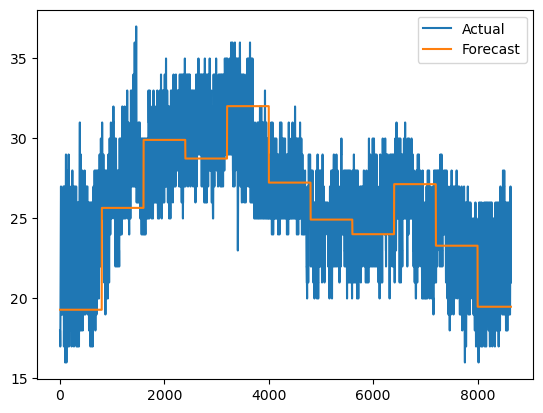

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys, os

warnings.filterwarnings("ignore")


class NullWriter(object):
    def write(self, arg):
        pass


nullwrite = NullWriter()
oldstdout = sys.stdout
sys.stdout = nullwrite

try:
    model_bengaluru_HeatIndexC = SARIMAX(
        np.log(ytrain_HeatIndexC), order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)
    )
    model_bengaluru_fit_HeatIndexC = model_bengaluru_HeatIndexC.fit()

    forecasts = []
    newObs = []

    for i in range(8640):
        yforecast_transformed = model_bengaluru_fit_HeatIndexC.get_forecast(steps=1)
        yforecast = np.exp(yforecast_transformed.predicted_mean)
        forecasts.append(yforecast.item())

        if i < len(ytest_humidity):
            testObs = ytest_HeatIndexC.iloc[i]
            newObs.append(np.log(testObs))

        if (i + 1) % 800 == 0 and newObs:
            model_bengaluru_fit_HeatIndexC = model_bengaluru_fit_HeatIndexC.append(
                newObs, refit=True
            )
            newObs = []

    if newObs:
        model_bengaluru_fit_HeatIndexC = model_bengaluru_fit_HeatIndexC.append(
            newObs, refit=True
        )

    forecasts = np.array(forecasts)

finally:
    sys.stdout = oldstdout

print(forecasts)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(ytest_HeatIndexC, forecasts))
mae = mean_absolute_error(ytest_HeatIndexC, forecasts)

print("RMSE:", rmse)
print("MAE:", mae)

x = np.arange(1, 8641)
plt.plot(x, ytest_HeatIndexC, label="Actual")
plt.plot(x, forecasts, label="Forecast")
plt.legend()
plt.show()

## SARIMA for precipMM

In [32]:
print(df["precipMM"])
print(df["precipMM"].isnull().sum())
print(ytrain_precipMM.isnull().sum())
print(ytrain_precipMM.sum())

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
96427    0.1
96428    0.6
96429    0.8
96430    0.4
96431    0.5
Name: precipMM, Length: 96432, dtype: float64
0
0
5503.699999999999


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29239D-02    |proj g|=  8.13681D-01

At iterate    5    f= -6.16286D-02    |proj g|=  5.01206D-01

At iterate   10    f= -1.13252D-01    |proj g|=  9.81126D-01

At iterate   15    f= -1.70042D-01    |proj g|=  2.68773D-01

At iterate   20    f= -1.84327D-01    |proj g|=  2.41183D-01

At iterate   25    f= -1.92434D-01    |proj g|=  4.84514D-02

At iterate   30    f= -1.92534D-01    |proj g|=  2.86073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
[0.00217431 0.00217431 0.00217431 ... 0.00217431 0.00217431 0.00217431]
RMSE: 0.7008273201903715
MAE: 0.2314056736576001


 This problem is unconstrained.


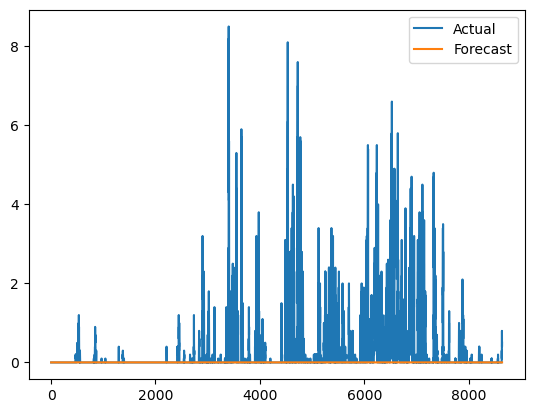

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys

warnings.filterwarnings("ignore")


class NullWriter(object):
    def write(self, arg):
        pass


nullwrite = NullWriter()
oldstdout = sys.stdout
sys.stdout = nullwrite

try:
    model_bengaluru_precipMM = SARIMAX(
        ytrain_precipMM, order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)
    )
    model_bengaluru_fit_precipMM = model_bengaluru_precipMM.fit()

    forecasts = []
    newObs = []

    for i in range(8640):
        yforecast_transformed = model_bengaluru_fit_precipMM.get_forecast(steps=1)
        yforecast = yforecast_transformed.predicted_mean
        forecasts.append(yforecast.item())

        if i < len(ytest_precipMM):
            testObs = ytest_precipMM.iloc[i]
            newObs.append(np.log(testObs))

        try:
            if (i + 1) % 800 == 0 and newObs:
                model_bengaluru_fit_precipMM = model_bengaluru_fit_precipMM.append(
                    newObs, refit=True
                )
                newObs = []
        except Exception as e:
            print(f"Error encountered at iteration {i}: {e}")

    if newObs:
        try:
            model_bengaluru_fit_precipMM = model_bengaluru_fit_precipMM.append(
                newObs, refit=True
            )
        except Exception as e:
            print(f"Error encountered at final append: {e}")

    forecasts = np.array(forecasts)

finally:
    sys.stdout = oldstdout

print(forecasts)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(ytest_precipMM, forecasts))
mae = mean_absolute_error(ytest_precipMM, forecasts)

print("RMSE:", rmse)
print("MAE:", mae)

x = np.arange(1, 8641)
plt.plot(x, ytest_precipMM, label="Actual")
plt.plot(x, forecasts, label="Forecast")
plt.legend()
plt.show()

In [25]:
ytrain_precipMM

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87787    0.0
87788    0.0
87789    0.0
87790    0.0
87791    0.0
Name: precipMM, Length: 87792, dtype: float64

## SARIMA for pressure

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.94266D+00    |proj g|=  5.56757D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     41      1     0     0   2.437D+01  -6.011D+00
  F =  -6.0105445589487481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.01072D+00    |proj g|=  3.27036D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     53      1     0     0   2.770D+01  -6.011D+00
  F =  -6.0107240224160812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.01094D+00    |proj g|=  2.83782D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   2.838D+01  -6.011D+00
  F =  -6.0109395301054533     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.01138D+00    |proj g|=  2.97895D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     66      2     0     0   2.959D+01  -6.011D+00
  F =  -6.0113763274303524     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.01090D+00    |proj g|=  2.79849D+01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   2.798D+01  -6.011D+00
  F =  -6.0108964879683118     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.01099D+00    |proj g|=  2.82632D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     17      1     0     0   2.826D+01  -6.011D+00
  F =  -6.0109885046411593     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.01054D+00    |proj g|=  2.67580D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     17      1     0     0   2.676D+01  -6.011D+00
  F =  -6.0105384189332947     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.00976D+00    |proj g|=  2.41878D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     14      1     0     0   2.419D+01  -6.010D+00
  F =  -6.0097645129159316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.00971D+00    |proj g|=  2.39866D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   2.399D+01  -6.010D+00
  F =  -6.0097104186412862     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.00931D+00    |proj g|=  2.26599D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     11      1     0     0   2.266D+01  -6.009D+00
  F =  -6.0093141920808826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.00831D+00    |proj g|=  1.93379D+01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   1.934D+01  -6.008D+00
  F =  -6.0083114580473609     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.00828D+00    |proj g|=  1.92083D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      1     21      1     0     0   1.921D+01  -6.008D+00
  F =  -6.0082774763068700     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


[1016.36901732 1016.36901732 1016.36901732 ... 1016.77348024 1016.77348024
 1016.77348024]
RMSE: 2.695709567475455
MAE: 2.1776661073563894


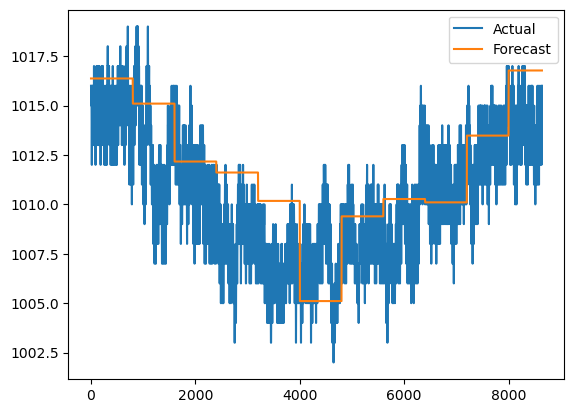

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sys, os

warnings.filterwarnings("ignore")


class NullWriter(object):
    def write(self, arg):
        pass


nullwrite = NullWriter()
oldstdout = sys.stdout
sys.stdout = nullwrite

try:
    model_bengaluru_pressure = SARIMAX(
        np.log(ytrain_pressure), order=(1, 0, 1), seasonal_order=(1, 1, 1, 12)
    )
    model_bengaluru_fit_pressure = model_bengaluru_pressure.fit()

    forecasts = []
    newObs = []

    for i in range(8640):
        yforecast_transformed = model_bengaluru_fit_pressure.get_forecast(steps=1)
        yforecast = np.exp(yforecast_transformed.predicted_mean)
        forecasts.append(yforecast.item())

        if i < len(ytest_pressure):
            testObs = ytest_pressure.iloc[i]
            newObs.append(np.log(testObs))

        if (i + 1) % 800 == 0 and newObs:
            model_bengaluru_fit_pressure = model_bengaluru_fit_pressure.append(
                newObs, refit=True
            )
            newObs = []

    if newObs:
        model_bengaluru_fit_pressure = model_bengaluru_fit_pressure.append(
            newObs, refit=True
        )

    forecasts = np.array(forecasts)

finally:
    sys.stdout = oldstdout

print(forecasts)

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(ytest_pressure, forecasts))
mae = mean_absolute_error(ytest_pressure, forecasts)

print("RMSE:", rmse)
print("MAE:", mae)

x = np.arange(1, 8641)
plt.plot(x, ytest_pressure, label="Actual")
plt.plot(x, forecasts, label="Forecast")
plt.legend()
plt.show()

# Forecasting using Prophet

In [4]:
!pip install prophet

In [5]:
df =  df_bengaluru

In [6]:
df_prophet_maxTemp = df[["date_time", "maxtempC"]]
df_prophet_minTemp = df[["date_time", "mintempC"]]
df_prophet_humidity = df[["date_time", "humidity"]]
df_prophet_HeatIndexC = df[["date_time", "HeatIndexC"]]
df_prophet_precipMM = df[["date_time", "precipMM"]]
df_prophet_pressure = df[["date_time", "pressure"]]

In [7]:
df_prophet_maxTemp = df_prophet_maxTemp.rename(
    columns={"date_time": "ds", "maxtempC": "y"}
)
df_prophet_minTemp = df_prophet_minTemp.rename(
    columns={"date_time": "ds", "mintempC": "y"}
)
df_prophet_humidity = df_prophet_humidity.rename(
    columns={"date_time": "ds", "humidity": "y"}
)

df_prophet_HeatIndexC = df_prophet_HeatIndexC.rename(
    columns={"date_time": "ds", "HeatIndexC": "y"}
)
df_prophet_precipMM = df_prophet_precipMM.rename(
    columns={"date_time": "ds", "precipMM": "y"}
)
df_prophet_pressure = df_prophet_pressure.rename(
    columns={"date_time": "ds", "pressure": "y"}
)

In [8]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error

prophet = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.5
)

## MaxTemp prediction using Prophet

In [28]:
test_data = df_prophet_maxTemp.tail(8640)

model = prophet
model.fit(
    df_prophet_maxTemp[:-8640]
)  

future = model.make_future_dataframe(periods=len(test_data), include_history=True)

forecast = model.predict(future)

actual_values = test_data["y"].values
predicted_values = forecast["yhat"].values[-len(test_data) :]

rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f"RMSE: {rmse}")

13:05:47 - cmdstanpy - INFO - Chain [1] start processing
13:06:19 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 5.4027932004759


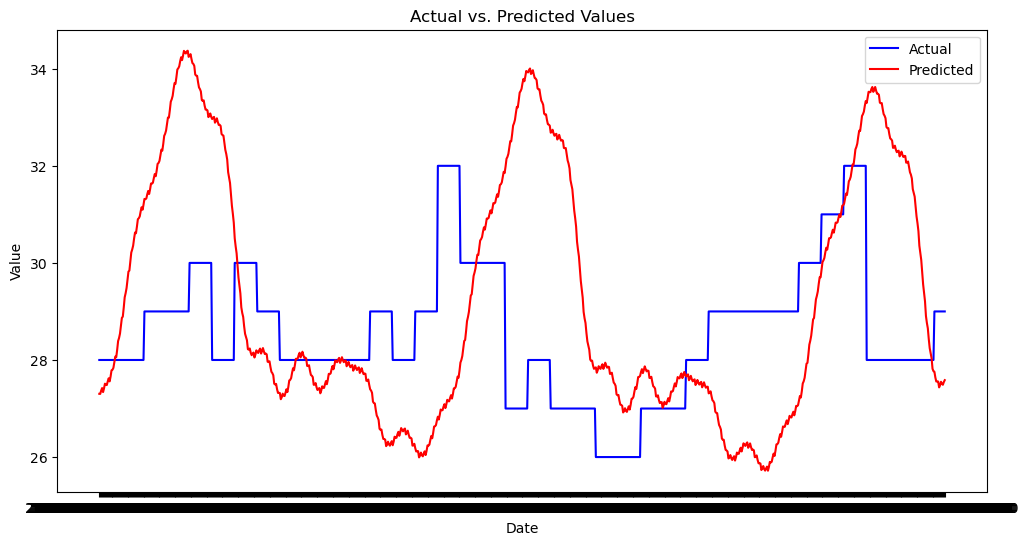

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["ds"][:900], actual_values[:900], label="Actual", color="blue")
plt.plot(test_data["ds"][:900], predicted_values[:900], label="Predicted", color="red")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

## MinTemp prediction using Prophet

In [44]:
test_data = df_prophet_minTemp.tail(8640)

model = Prophet(
    seasonality_mode="multiplicative",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=1,
)

model.fit(df_prophet_minTemp[:-8640])

future = model.make_future_dataframe(periods=len(test_data), include_history=True)

forecast = model.predict(future)

actual_values = test_data["y"].values
predicted_values = forecast["yhat"].values[-len(test_data) :]

rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f"RMSE: {rmse}")

13:30:42 - cmdstanpy - INFO - Chain [1] start processing
13:31:23 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 16.20808230504998


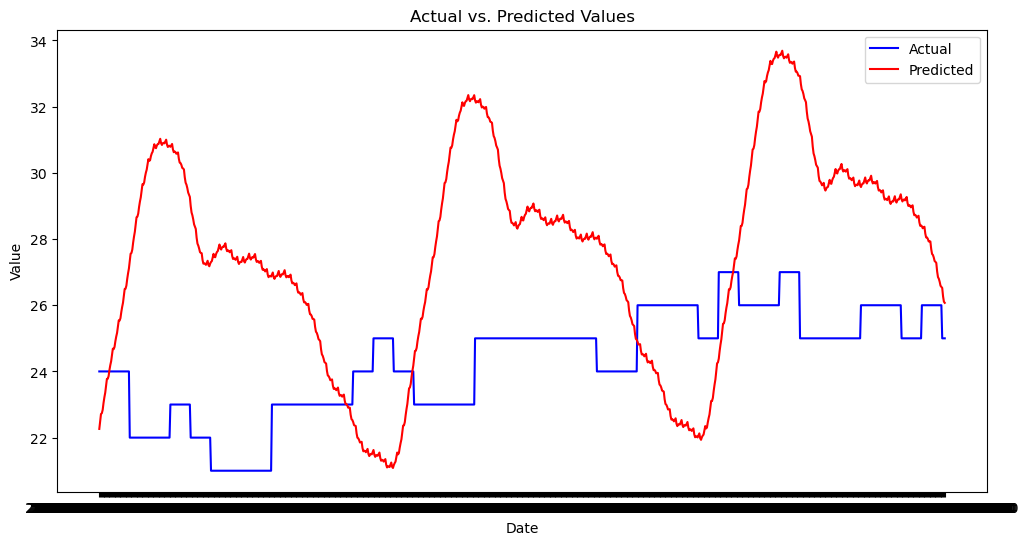

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["ds"][1500:2500], actual_values[1500:2500], label="Actual", color="blue")
plt.plot(
    test_data["ds"][1500:2500], predicted_values[1500:2500], label="Predicted", color="red"
)
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

## Humidity prediction using Prophet

In [46]:

test_data = df_prophet_humidity.tail(8640)


model = Prophet(
    seasonality_mode="multiplicative",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.5,
)
model.fit(
    df_prophet_humidity[:-8640]
)  


future = model.make_future_dataframe(periods=len(test_data), include_history=False)


forecast = model.predict(future)



actual_values = test_data["y"].values
predicted_values = forecast["yhat"].values[-len(test_data) :]


rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))


print(f"RMSE: {rmse}")

13:33:03 - cmdstanpy - INFO - Chain [1] start processing
13:33:46 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 48.31701900008717


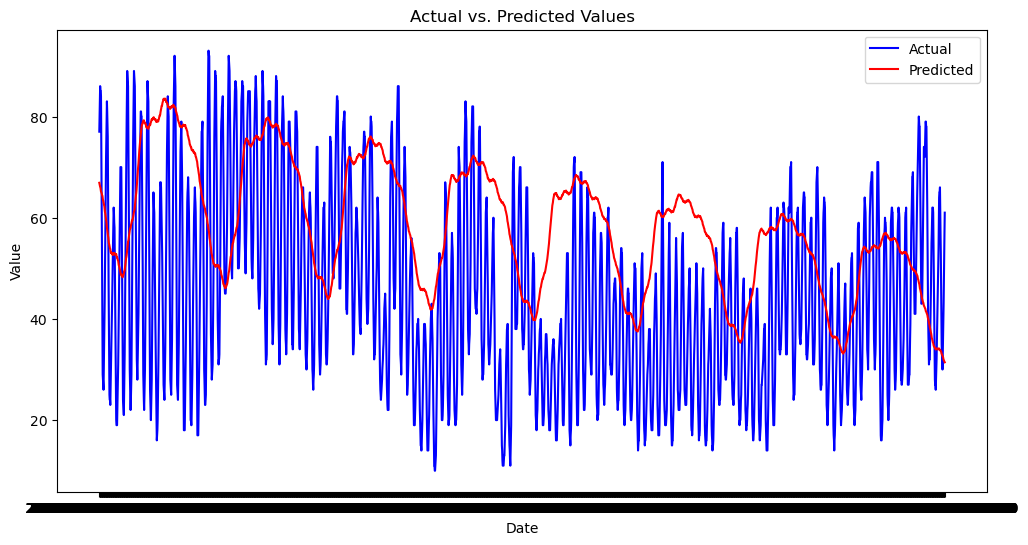

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["ds"][:3000], actual_values[:3000], label="Actual", color="blue")
plt.plot(test_data["ds"][:3000], predicted_values[:3000], label="Predicted", color="red")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

## HeatIndex prediction using Prophet

In [48]:

test_data = df_prophet_HeatIndexC.tail(8640)


model = Prophet(
    seasonality_mode="multiplicative",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.5,
)
model.fit(
    df_prophet_HeatIndexC[:-8640]
) 

future = model.make_future_dataframe(periods=len(test_data), include_history=False)

forecast = model.predict(future)

actual_values = test_data["y"].values
predicted_values = forecast["yhat"].values[-len(test_data) :]

rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f"RMSE: {rmse}")

13:36:32 - cmdstanpy - INFO - Chain [1] start processing
13:37:10 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 5.866881236319814


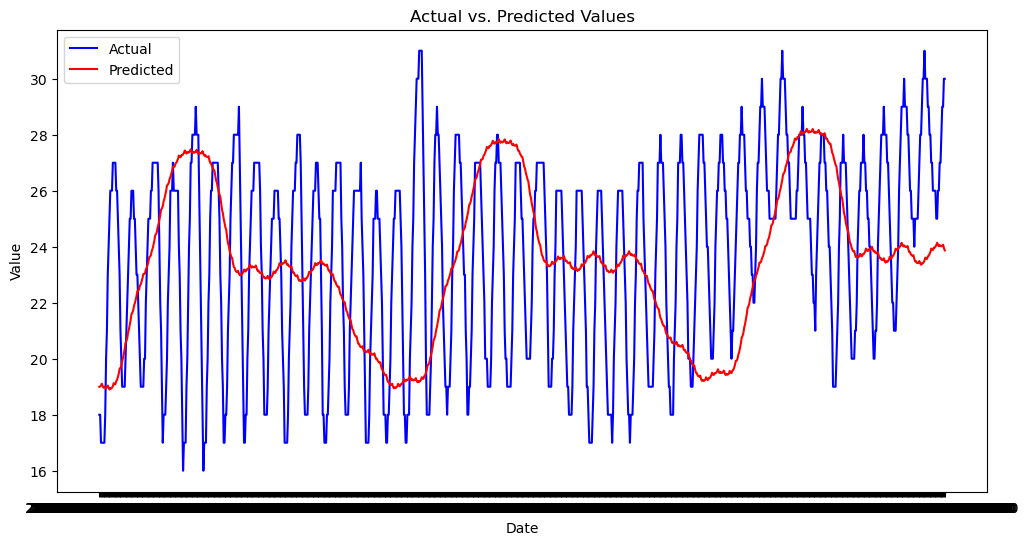

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(test_data["ds"][:1000], actual_values[:1000], label="Actual", color="blue")
plt.plot(test_data["ds"][:1000], predicted_values[:1000], label="Predicted", color="red")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

## Precipitation prediction using Prophet

In [51]:

test_data = df_prophet_precipMM.tail(8640)


model = Prophet(
    seasonality_mode="multiplicative",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.5,
)
model.fit(
    df_prophet_precipMM[:-8640]
)


future = model.make_future_dataframe(periods=len(test_data), include_history=False)


forecast = model.predict(future)



actual_values = test_data["y"].values
predicted_values = forecast["yhat"].values[-len(test_data) :]


rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))


print(f"RMSE: {rmse}")

13:39:34 - cmdstanpy - INFO - Chain [1] start processing
13:39:56 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 0.6852318946071259


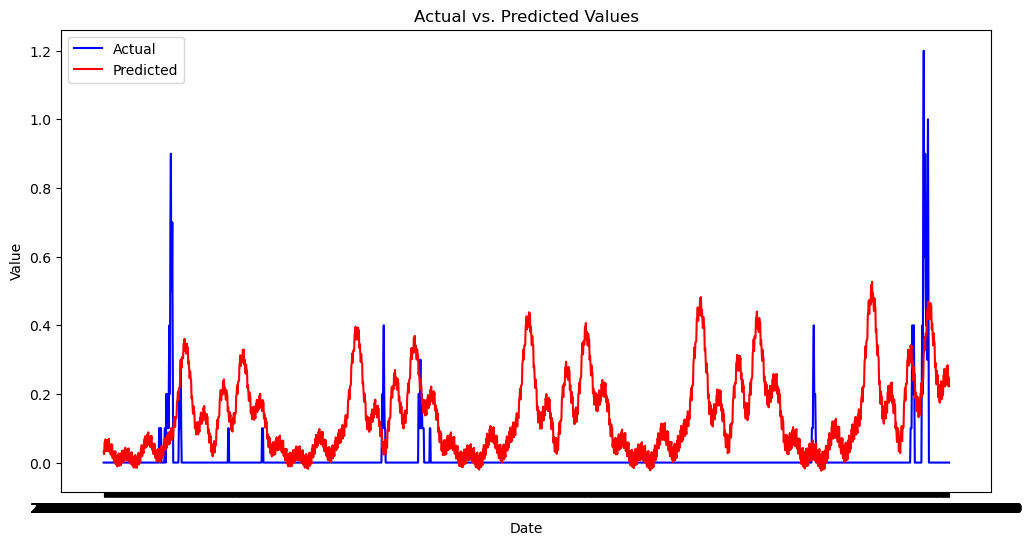

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(
    test_data["ds"][700:2500], actual_values[700:2500], label="Actual", color="blue"
)
plt.plot(
    test_data["ds"][700:2500],
    predicted_values[700:2500],
    label="Predicted",
    color="red",
)
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

## Pressure prediction using Prophet

In [20]:
test_data = df_prophet_pressure.tail(8640)


model = Prophet(
    seasonality_mode="multiplicative",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.5,
)
model.fit(
    df_prophet_pressure[:-8640]
)


future = model.make_future_dataframe(periods=len(test_data), include_history=True)


forecast = model.predict(future)



actual_values = test_data["y"].values
predicted_values = forecast["yhat"].values[-len(test_data) :]


rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))


print(f"RMSE: {rmse}")

14:23:26 - cmdstanpy - INFO - Chain [1] start processing
14:23:48 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 5.3295602673114235


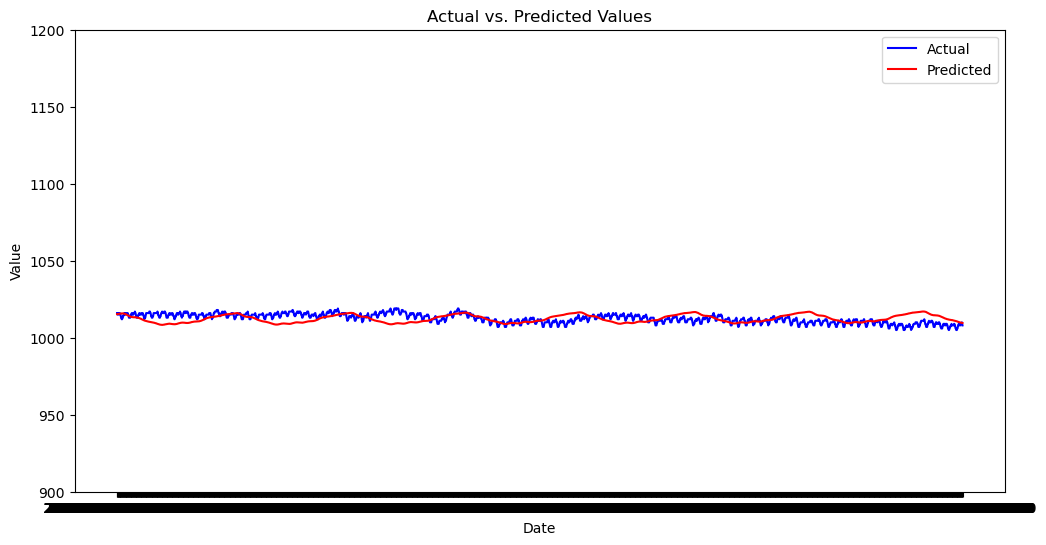

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data["ds"][0:2700], actual_values[0:2700], label="Actual", color="blue")
plt.plot(
    test_data["ds"][0:2700],
    predicted_values[0:2700],
    label="Predicted",
    color="red",
)

plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Date")
plt.ylabel("Value")

plt.ylim(
    [900, 1200]
)  

plt.show()